In [1]:
import numpy as np

# Tutorial :- A Complete Practical Guide to Creating Neural Networks from the Mathematical Background to the Implementation with Python

## By Gary Cook

## 0. Introduction

The aim of this tutorial and subsequent tutorials is to be a free guide to help anyone who wishes to learn about neural networks to develop a detailed and practical understanding of all the steps involved in building and training an artificial neural network.
To that end, this introductory section is used to give an overview of the mathematical concepts that will be used in later sections and throughout those sections, each step will be explained in as much detail as possible and where appropriate demonstrated with diagrams, examples and code.

Working with neural networks means working with matrices of numbers and matrix equation, so the first thing to be introduced in
Section 0.1 is the concept of a matrix and the methods that will be used to manipulate matrices and understand matrix equations.
In later sections, all calculations are given in concise matrix form, for those who are comfortable working with matrices, and in an expanded form, to help those who are less familiar with matrices to visualise the process and aid their understanding.

An important method for training neural networks is the gradient descent algorithm and the values of the gradients used therein are calculated using the backpropagation algorithm and that algorithm involves passing values through a chain of partial derivatives, the equation of which is determined by the chain rule.
Section 0.2 starts with an introduction to the concepts of derivatives and partial derivatives from a very limited perspective that focuses on understanding the concept of gradient.
After a brief introduction to the ideas of local minimum points and convexity, the gradient descent algorithm is introduced, followed by an introduction to the chain rule that will be used to calculate the gradients.
The gradient descent algorithm, its preliminaries and the chain rule are first introduced for functions in one variable and then extended to multivariable functions so as to gently introduce the reader to these concepts with the help of simple examples and code.

One of the simplest types of neural network is the Feedforward Artificial Neural Network (ANN) and in Section 1 it is networks of this type that are introduced, explained and created from scratch with Python and NumPy.

It is the authors intent that in later sections, at the very least, the concepts of Recurrent Neural Networks RNNS and Long Short-Term Memory (LSTM) will be introduced and created from scratch with Python and NumPy and possibly with TensorFlow.

**Prerequisites :-** A basic understanding of mathematics and mathematical notation in addition to a basic understanding of Python and NumPy.  
**Useful :-** A basic understanding of matrices and calculus would be of great benefit; however, the minimum knowledge required to follow Section 1 is given in Section 0.1 and Section 0.2.  
Anyone who is familiar with these concepts can skip to Section 1.

**Contents of Section 0**
- Section 0.1 Matrix Requirements  
 - Section 0.1.1 Matrices
 - Section 0.1.2 Matrix Addition
 - Section 0.1.3 Scalar Multiplication
 - Section 0.1.4 Hadamard Multiplication
 - Section 0.1.5 Transposition
 - Section 0.1.6 Dot Product
 - Section 0.1.7 Matrix Multiplication
 - Section 0.1.8 Manipulating Transpositions
 - Section 0.1.9 Functions
 - Section 0.1.10 Example
- Section 0.2 Calculus Requirements
 - Section 0.2.1 Derivatives in One Variable
 - Section 0.2.2 Partial Derivatives
 - Section 0.2.3 Local minimum and Convex Functions in One Variable
 - Section 0.2.4 Gradient Descent Algorithm in One Variable
 - Section 0.2.5 Multivariable Gradient Descent Algorithm
 - Section 0.2.6 The Chain Rule in One Variable
 - Section 0.2.7 Multivariable Chain Rule

### 0.1 Matrix Requirements

### 0.1.1 Matrices

An $m \times n$ matrix $U$ is an array of elements(for our purposes numbers) with $m$ rows and $n$ columns that is denoted as 
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2} & \dots & u_{0, n-1} \\
u_{1, 0} & u_{1, 1} & u_{1, 2} & \dots & u_{1, n-1} \\
u_{2, 0} & u_{2, 1} & u_{2, 2} & \dots & u_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} & u_{m-1, 1} & u_{m-1, 2} & \dots & u_{m-1, n-1}
\end{pmatrix},
$$
where the number in the $i$-th row and $j$-th column is $u_{i, j}$, sometimes denoted as $u_{i j}$, $U_{i,j}$, $U_{i j}$, $U[i,j]$, so long as the meaning is unambiguous.

A row vector $\bf{a}$ is a $1 \times n$ matrix that is denoted as
$$
{\bf{a}}
=
\begin{bmatrix}
a_0 & a_1 & a_2 & \dots & a_{n-1}
\end{bmatrix}
$$

A column vector $\bf{b}$ is a $m \times 1$ matrix that is denoted as
$$
{\bf{b}}
=
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots \\
b_{m-1}
\end{bmatrix}.
$$





### 0.1.2 Matrix Addition

Let $U$ and $V$ be the $m \times n$ matrices
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2} & \dots & u_{0, n-1} \\
u_{1, 0} & u_{1, 1} & u_{1, 2} & \dots & u_{1, n-1} \\
u_{2, 0} & u_{2, 1} & u_{2, 2} & \dots & u_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} & u_{m-1, 1} & u_{m-1, 2} & \dots & u_{m-1, n-1}
\end{pmatrix}
$$
and
$$
V
=
\begin{pmatrix}
v_{0, 0} & v_{0, 1} & v_{0, 2} & \dots & v_{0, n-1} \\
v_{1, 0} & v_{1, 1} & v_{1, 2} & \dots & v_{1, n-1} \\
v_{2, 0} & v_{2, 1} & v_{2, 2} & \dots & v_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
v_{m-1, 0} & v_{m-1, 1} & v_{m-1, 2} & \dots & v_{m-1, n-1}
\end{pmatrix},
$$
then their addition is performed element-wise; that is,
$$
U+V
=
\begin{pmatrix}
u_{0, 0} + v_{0, 0} & u_{0, 1} + v_{0, 1} & u_{0, 2} + v_{0, 2} & \dots & u_{01, n-1} + v_{0, n-1} \\
u_{1, 0} + v_{1, 0} & u_{1, 1} + v_{1, 1} & u_{1, 2} + v_{1, 2} & \dots & u_{1, n-1} + v_{1, n-1} \\
u_{2, 0} + v_{2, 0} & u_{2, 1} + v_{2, 1} & u_{1, 2} + v_{2, 2} & \dots & u_{2, n-1} + v_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} + v_{m-1, 0} & u_{m-1, 1} + v_{m-1, 1} & u_{m-1, 2} + v_{m-1, 2} & \dots & u_{m-1, n-1} + v_{m-1, n-1}
\end{pmatrix}.
$$





### 0.1.3 Scalar Multiplication

Let $c$ be a scalar(a number) and let $U$ be the $m \times n$ matrix
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2} & \dots & u_{0, n-1} \\
u_{1, 0} & u_{1, 1} & u_{1, 2} & \dots & u_{1, n-1} \\
u_{2, 0} & u_{2, 1} & u_{2, 2} & \dots & u_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} & u_{m-1, 1} & u_{m-1, 2} & \dots & u_{m-1, n-1}
\end{pmatrix},
$$
then scalar multiplication is element-wise; that is,
$$
c U
=
\begin{pmatrix}
c u_{0, 0} & c u_{0, 1} & c u_{0, 2} & \dots & c u_{0, n-1} \\
c u_{1, 0} & c u_{1, 1} & c u_{1, 2} & \dots & c u_{1, n-1} \\
c u_{2, 0} & c u_{2, 1} & c u_{2, 2} & \dots & c u_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
c u_{m-1, 0} & c u_{m-1, 1} & c u_{m-1, 2} & \dots & c u_{m-1, n-1}
\end{pmatrix}.
$$





### 0.1.4 Hadamard Multiplication

Let $U$ and $V$ be the $m \times n$ matrices
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2} & \dots & u_{0, n-1} \\
u_{1, 0} & u_{1, 1} & u_{1, 2} & \dots & u_{1, n-1} \\
u_{2, 0} & u_{2, 1} & u_{2, 2} & \dots & u_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} & u_{m-1, 1} & u_{m-1, 2} & \dots & u_{m-1, n-1}
\end{pmatrix}
$$
and
$$
V
=
\begin{pmatrix}
v_{0, 0} & v_{0, 1} & v_{0, 2} & \dots & v_{0, n-1} \\
v_{1, 0} & v_{1, 1} & v_{1, 2} & \dots & v_{1, n-1} \\
v_{2, 0} & v_{2, 1} & v_{2, 2} & \dots & v_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
v_{m-1, 0} & v_{m-1, 1} & v_{m-1, 2} & \dots & v_{m-1, n-1}
\end{pmatrix},
$$
then Hadamard multiplication is performed element-wise; that is,
$$
U \circ V
=
\begin{pmatrix}
u_{0, 0}v_{0, 0} & u_{0, 1}v_{0, 1} & u_{0, 2}v_{0, 2} & \dots & u_{01, n-1}v_{0, n-1} \\
u_{1, 0}v_{1, 0} & u_{1, 1}v_{1, 1} & u_{1, 2}v_{1, 2} & \dots & u_{1, n-1}v_{1, n-1} \\
u_{2, 0}v_{2, 0} & u_{2, 1}v_{2, 1} & u_{1, 2}v_{2, 2} & \dots & u_{2, n-1}v_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0}v_{m-1, 0} & u_{m-1, 1}v_{m-1, 1} & u_{m-1, 2}v_{m-1, 2} & \dots & u_{m-1, n-1}v_{m-1, n-1}
\end{pmatrix}.
$$





### 0.1.5 Transposition

Let $U$ be the $m \times n$ matrix
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2} & \dots & u_{0, n-1} \\
u_{1, 0} & u_{1, 1} & u_{1, 2} & \dots & u_{1, n-1} \\
u_{2, 0} & u_{2, 1} & u_{2, 2} & \dots & u_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} & u_{m-1, 1} & u_{m-1, 2} & \dots & u_{m-1, n-1}
\end{pmatrix},
$$
then its transpose, denoted $U^T$ is the $n \times m$ matrix
$$
U^T
=
\begin{pmatrix}
u_{0, 0} & u_{1, 0} & u_{2, 0} & \dots & u_{m-1, 0} \\
u_{0, 1} & u_{1, 1} & u_{2, 1} & \dots & u_{m-1, 1} \\
u_{0, 2} & u_{1, 2} & u_{2, 2} & \dots & u_{m-1, 2} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{0, n-1} & u_{1, n-1} & u_{2, n-1} & \dots & u_{m-1, n-1}
\end{pmatrix},
$$
the $i$-th row and $j$-th column of which are the $i$-th column and $j$-the row of $U$.

The transpose of the row vector 
$$
{\bf{a}}
=
\begin{bmatrix}
a_0 & a_1 & a_2 & \dots & a_{n-1}
\end{bmatrix}
$$
is the column vector
$$
{\bf{a}}^T
=
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_{n-1}
\end{bmatrix}
$$
and the transpose of the column vector 
$$
{\bf{b}}
=
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots \\
b_{m-1}
\end{bmatrix}
$$
is the row vector
$$
{\bf{b}}^T
=
\begin{bmatrix}
b_0 & b_1 & b_2 & \dots & b_{m-1}
\end{bmatrix}.
$$





### 0.1.6 Dot Product

Let $\bf{a}$ and $\bf{b}$ be the row vectors with $n$ elements
$$
{\bf{a}}
=
\begin{bmatrix}
a_0 & a_1 & a_2 & \dots & a_{n-1}
\end{bmatrix}
\text{ and }
{\bf{b}}
=
\begin{bmatrix}
b_0 & b_1 & b_2 & \dots & b_{n-1}
\end{bmatrix},
$$
then the dot product of $\bf{a}$ and $\bf{b}$ is the sum of $a_i b_i$ for all $i = 0, 1, 2, \ldots, n-1$; that is,
$$
{\bf{a}} \cdot {\bf{b}} = \sum_{i=0}^{n-1} a_i b_i = a_0 b_0 + a_1 b_1 + a_2 b_2 + \dots + a_{n-1} b_{n-1}.
$$

Similarly, let $\bf{a}$ and $\bf{b}$ be the column vectors with $n$ elements
$$
{\bf{a}}
=
\begin{bmatrix}
a_0 \\
a_1 \\
a_2 \\
\vdots \\
a_{n-1}
\end{bmatrix}
\text{ and }
{\bf{b}}
=
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots \\
b_{n-1}
\end{bmatrix},
$$
then the dot product of $\bf{a}$ and $\bf{b}$ is the sum of $a_i b_i$ for all $i = 0, 1, 2, \ldots, n-1$; that is,
$$
{\bf{a}} \cdot {\bf{b}} = \sum_{i=0}^{n-1} a_i b_i = a_0 b_0 + a_1 b_1 + a_2 b_2 + \dots + a_{n-1} b_{n-1}.
$$





### 0.1.7 Matrix Multiplication

Let $\bf{a}$ be the row vector with $n$ elements
$$
{\bf{a}}
=
\begin{bmatrix}
a_0 & a_1 & a_2 & \dots & a_{n-1}
\end{bmatrix}
$$
and let $\bf{b}$ be the column vector with $n$ elements
$$
{\bf{b}}
=
\begin{bmatrix}
b_0 \\
b_1 \\
b_2 \\
\vdots \\
b_{n-1}
\end{bmatrix},
$$
then their matrix product, denoted $\bf{ab}$, is the dot product of $\bf{a}$ and ${\bf{b}}^T$, or equivalently the dot product of ${\bf{a}}^T$ and $\bf{b}$; that is,
$$
{\bf{ab}} = {\bf{a}} \cdot {\bf{b}}^T = {\bf{a}}^T \cdot {\bf{b}} = \sum_{i=0}^{n-1} a_i b_i = a_0 b_0 + a_1 b_1 + a_2 b_2 + \dots + a_{n-1} b_{n-1}.
$$

Let $U$ be the $m \times p$ matrix
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2} & \dots & u_{0, p-1} \\
u_{1, 0} & u_{1, 1} & u_{1, 2} & \dots & u_{1, p-1} \\
u_{2, 0} & u_{2, 1} & u_{2, 2} & \dots & u_{2, p-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
u_{m-1, 0} & u_{m-1, 1} & u_{m-1, 2} & \dots & u_{m-1, p-1}
\end{pmatrix}
$$
and let $V$ be the $p \times n$ matrix
$$
V
=
\begin{pmatrix}
v_{0, 0} & v_{0, 1} & v_{0, 2} & \dots & v_{0, n-1} \\
v_{1, 0} & v_{1, 1} & v_{1, 2} & \dots & v_{1, n-1} \\
v_{2, 0} & v_{2, 1} & v_{2, 2} & \dots & v_{2, n-1} \\
\vdots & \vdots & \dots & \dots & \vdots \\
v_{p-1, 0} & v_{p-1, 1} & v_{p-1, 2} & \dots & v_{p-1, n-1}
\end{pmatrix},
$$
then their matrix product, denoted $UV$, is the $m$ by $n$ matrix the element in the $j$-th row and $k$-th column of which is the matrix product of the $j$-th row of the matrix $U$ and the $k$-th column of the matrix $V$; that is, 
$$
UV_{j k} = \sum_{i = 0}^{p-1} u_{j i} v_{i k} =  u_{j 0} v_{0 k} + u_{j 1} v_{1 k} + u_{j 2} v_{2 k} + \dots u_{j, p-1} v_{p-1, k},
$$
this is why the number of columns in $U$ is equal to the number of rows in $V$ and why $UV$ has the same number of rows as $U$ and the same number of columns as $V$.

*Example*  
Let $U$ be the $4 \times 3$ matrix 
$$
U
=
\begin{pmatrix}
u_{0, 0} & u_{0, 1} & u_{0, 2}  \\
u_{1, 0} & u_{1, 1} & u_{1, 2}  \\
u_{2, 0} & u_{2, 1} & u_{2, 2}  \\
u_{3, 0} & u_{3, 1} & u_{3, 2}
\end{pmatrix}
$$
and let $V$ be the $3 \times 2$ matrix
$$
V
=
\begin{pmatrix}
v_{0, 0} & v_{0, 1} \\
v_{1, 0} & v_{1, 1} \\
v_{2, 0} & v_{2, 1} \\
\end{pmatrix},
$$
then $UV$ is the $4 \times 2$ matrix 
$$
UV
=
\begin{pmatrix}
u_{0, 0} v_{0, 0} + u_{0, 1} v_{1, 0} + u_{0, 2} v_{2, 0} & u_{0, 0} v_{0, 1} + u_{0, 1} v_{1, 1} + u_{0, 2} v_{2, 1} \\
u_{1, 0} v_{0, 0} + u_{1, 1} v_{1, 0} + u_{1, 2} v_{2, 0} & u_{1, 0} v_{0, 1} + u_{1, 1} v_{1, 1} + u_{1, 2} v_{2, 1} \\
u_{2, 0} v_{0, 0} + u_{2, 1} v_{1, 0} + u_{2, 2} v_{2, 0} & u_{2, 0} v_{0, 1} + u_{2, 1} v_{1, 1} + u_{2, 2} v_{2, 1} \\
u_{3, 0} v_{0, 0} + u_{3, 1} v_{1, 0} + u_{3, 2} v_{2, 0} & u_{3, 0} v_{0, 1} + u_{3, 1} v_{1, 1} + u_{3, 2} v_{2, 1}
\end{pmatrix}.
$$





### 0.1.8 Manipulating Transpositions

In Python, it is often easier to work with vectors in row form that are presented in column form in calculations, so it is necessary to know how to manipulate matrix equations through transposition.  
The following simple rules are sufficient for that purpose.
1. $(W^T)^T = W$.  
2. If $W = U + V$, then $W^T = U^T + V^T$.  
3. If $W = cU$, where $c$ is a scalar, then $W^T = cU^T$.  
4. If $W = U \circ V$, then $W^T = U^T \circ V^T$.  
5. IF $W = UV$, then $W^T = V^T U^T$.





### 0.1.9 Functions

Let $f: \mathbb{R} \rightarrow \mathbb{R}$ be a function, such as $f(x) = x^2 + 1$, and let $U$ be an $m \times n$ matrix, then throughout this document the application of $f$ to $U$ element-wise is denoted as $f(U)$.

*Example*  
If $f(x) = x^2 + 1$ and 
$$
U
=
\begin{pmatrix}
0 & 2 \\
-3 & 0.5
\end{pmatrix},
$$
then
$$
f(U)
=
\begin{pmatrix}
f(0) & f(2) \\
f(-3) & f(0.5)
\end{pmatrix}
=
\begin{pmatrix}
1 & 5 \\
10 & 1.25
\end{pmatrix}.
$$

### 0.1.10 Example

Examples of how to create and manipulate the vectors
$$
a = 
\begin{bmatrix}
2 & -1 & 3
\end{bmatrix}
\text{ and }
b = 
\begin{bmatrix}
0 \\
4 \\
3
\end{bmatrix}
$$
and the matrices
$$
U = 
\begin{pmatrix}
1 & 0 & -1 \\
0 & 1 & 0 \\
1 & -1 & 1
\end{pmatrix}
\text{ and }
V = 
\begin{pmatrix}
2 & 4 & 0 \\
-3 & 1 & -2 \\
0 & -1 & 7
\end{pmatrix};
$$
finishing with an example of matrix multiplication with multiple vectors that works because the vectors are in axis 0 of the NumPy array, see example in code.

In [2]:
# Creating vectors, matrices and their transposes

print("Vector a")
vector_a = np.array([2, -1, 3])
print(vector_a)
print("Shape of Vector a")
print(vector_a.shape)
print("Transpose of Vector a")
print(vector_a.reshape(3,1))
print()
print(vector_a.T, " - .T doesn't generate an array of shape (3,1)")
print()
print(np.transpose(vector_a), " - .transpose doesn't generate an array of shape (3,1)")
print()
print("Vector a")
vector_a = np.array([[2, -1, 3]])
print(vector_a)
print("Shape of Vector a")
print(vector_a.shape)
print()
print("Vector a")
vector_a = np.array([2, -1, 3]).reshape(1,3)
print(vector_a)
print("Shape of Vector a")
print(vector_a.shape)
print()
print("Transpose of Vector a")
print(vector_a.reshape(3,1))
print()
print(vector_a.T)
print()
print(np.transpose(vector_a))
print()
print("Vector b")
vector_b = np.array([[[0], [4], [3]]])
print(vector_b)
print("Shape of Vector b")
print(vector_b.shape)
print()
print("Vector b")
vector_b = np.array([0, 4, 3]).reshape(3,1)
print(vector_b)
print("Shape of Vector b")
print(vector_b.shape)
print()
print("Transpose of Vector b")
print(vector_b.reshape(1,3))
print()
print(vector_b.T)
print()
print(np.transpose(vector_b))
print()
print("Matrix U")
matrix_U = np.array([[1, 0, -1], [0, 1, 0], [1, -1, 1]])
print(matrix_U)
print("Shape of Matrix U")
print(matrix_U.shape)
print()
print("Matrix U")
matrix_U = np.array([1, 0, -1, 0, 1, 0, 1, -1, 1]).reshape(3,3)
print(matrix_U)
print("Shape of Matrix U")
print(matrix_U.shape)
print()
print("Transpose of Matrix U")
print(matrix_U.T)
print()
print("Transpose of Matrix U")
print(np.transpose(matrix_U))
print()

# Scalar Multiplcation
print("10 a")
print(10*vector_a)
print()
print("-b")
print(-1*vector_b)
print()
print("2U")
print(2*matrix_U)
print()

# Matrix Addition
matrix_V = np.array([2, 4, 0, -3, 1, -2, 0, -1, 7]).reshape(3,3)
print("U+V")
print(matrix_U + matrix_V)
print()

# Hadamard Multiplication
print("U*V (Hadamard)")
print(matrix_U * matrix_V)
print()

# Dot Product
print("a . b")
print(np.dot(vector_a,vector_b))
print()
print("a b (Matrix Multiplication)")
print(np.dot(vector_a, vector_b))
print()
print("b a (Matrix Multiplication)")
print(np.dot(vector_b, vector_a))
print()
print("a b (Matrix Multiplication)")
print(np.matmul(vector_a, vector_b))
print()
print("b a (Matrix Multiplication)")
print(np.matmul(vector_b, vector_a))
print()

# Matrix Multiplication
print("U V (Matrix Multiplication)")
print(np.matmul(matrix_U, matrix_V))
print()
print("U V (Matrix Multiplication)")
print(np.dot(matrix_U, matrix_V))
print()

# Functions
print("e^U + 1")
print(np.exp(matrix_U) + 1)
print()

# Operations on Multiple Vectors
print("[a U, b.T U]")
vectors_a_and_b = np.array([[2, -1, 3], [0, 4, 3]])
print(np.matmul(vectors_a_and_b, matrix_U))
print()

print("[a.T U, b U]")
vectors_a_and_b_transpose = np.array([[[2], [-1], [3]], [[0], [4], [3]]])
print(np.matmul(matrix_U.T, vectors_a_and_b_transpose))
print()

# Axis 0
for i in vectors_a_and_b:
    print(i)
for i in vectors_a_and_b_transpose:
    print(i)

Vector a
[ 2 -1  3]
Shape of Vector a
(3,)
Transpose of Vector a
[[ 2]
 [-1]
 [ 3]]

[ 2 -1  3]  - .T doesn't generate an array of shape (3,1)

[ 2 -1  3]  - .transpose doesn't generate an array of shape (3,1)

Vector a
[[ 2 -1  3]]
Shape of Vector a
(1, 3)

Vector a
[[ 2 -1  3]]
Shape of Vector a
(1, 3)

Transpose of Vector a
[[ 2]
 [-1]
 [ 3]]

[[ 2]
 [-1]
 [ 3]]

[[ 2]
 [-1]
 [ 3]]

Vector b
[[[0]
  [4]
  [3]]]
Shape of Vector b
(1, 3, 1)

Vector b
[[0]
 [4]
 [3]]
Shape of Vector b
(3, 1)

Transpose of Vector b
[[0 4 3]]

[[0 4 3]]

[[0 4 3]]

Matrix U
[[ 1  0 -1]
 [ 0  1  0]
 [ 1 -1  1]]
Shape of Matrix U
(3, 3)

Matrix U
[[ 1  0 -1]
 [ 0  1  0]
 [ 1 -1  1]]
Shape of Matrix U
(3, 3)

Transpose of Matrix U
[[ 1  0  1]
 [ 0  1 -1]
 [-1  0  1]]

Transpose of Matrix U
[[ 1  0  1]
 [ 0  1 -1]
 [-1  0  1]]

10 a
[[ 20 -10  30]]

-b
[[ 0]
 [-4]
 [-3]]

2U
[[ 2  0 -2]
 [ 0  2  0]
 [ 2 -2  2]]

U+V
[[ 3  4 -1]
 [-3  2 -2]
 [ 1 -2  8]]

U*V (Hadamard)
[[2 0 0]
 [0 1 0]
 [0 1 7]]

a . b
[[5]]

### 0.2 Calculus Requirements

### 0.2.1 Derivatives in One Variable

The derivative of the function $y = f(x)$, if it exists, is a function, denoted $\frac{dy}{dx}$ or $f'(x)$, the value of which at $x=a$, denoted $\frac{dy}{dx} \Big|_a$ or $f'(a)$, is the slope (or gradient) of the curve described by the equation $y = f(x)$ at the point $(a, f(a))$.

To visualise the gradient of $f$ at a point $(a,f(a))$ it helps to plot segments of the tangent line to $f$ at that point, that is, the line with gradient $f'(a)$ that passes through the point $(a, f(a))$ or algebraically the line given by the equation 
$y - f(a) = f'(a) (x - a)$.

For example, let $f$ be the function $f(x) = x^2 + 1$, then its derivative is $f'(x) = 2x$, so the gradient of the curve 
$y = x^2+1$ at $x=-4$, $x=-1$, $x=0$ and $x=1$, $x=4$ is $f'(-4) = -8$, $f'(-1) = -2$, $f'(0) = 0$ $f'(1) = 2$ and $f'(4) = 8$ respectively.

The tangent line to $f$ at $x=-4$ is $y= -8x - 15$, the tangent line to $f$ at $x = -2$ is $y = -4x - 3$, the tangent line to $f$ at $x=0$ is $y = 1$, the tangent line to $f$ at $x=2$ is $y = 4x - 3$ and the tangent line to $f$ at $x=4$ is $y = 8x - 15$.

**Note:-** Calculating the derivative of a function is not discussed here. The derivatives of only a small number of functions are required here and these are given explicitly. The derivatives of the three activation functions that are given in Section 1.1 are given in Section 1.6.4.

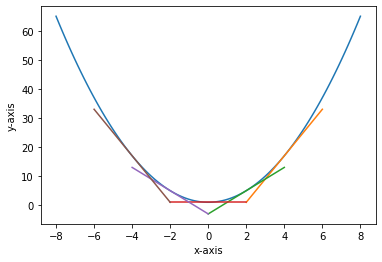

In [3]:
%matplotlib inline

import matplotlib.pyplot as plt  

# the curve x**2 + 1
x = np.linspace(-8, 8, 100)
y = eval('x**2 + 1')

# tangent line at x = 4
x0 = np.linspace(2, 6, 100)
t0 = eval('8*x0 - 15')

# tangent line at x = 2
x1 = np.linspace(0, 4, 100)
t1 = eval('4*x1 - 3')

# tangent line at x = 0
x2 = np.linspace(-2, 2, 100)
t2 = eval('0*x2 + 1')

# tangent line at x = -2
x3 = np.linspace(-4, 0, 100)
t3 = eval('-4*x3 -3')

# tangent line at x = -4
x4 = np.linspace(-6, -2, 100)
t4 = eval('-8*x4 -15')

plt.plot(x, y)
plt.plot(x0, t0)
plt.plot(x1 ,t1)
plt.plot(x2 ,t2)
plt.plot(x3 ,t3)
plt.plot(x4 ,t4)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.show()

### 0.2.2 Partial Derivatives

A continuous function in one variable $y = f(x)$ receives a value of $x$ and for every value of $x$ there exists exactly one value of $y$ that satisfies $y=f(x)$ and the points $(x,y=f(x))$ exist in the $xy$-plane with a horizontal $x$-axis and a vertical $y$-axis, which can be visualised, for example, in the depiction of $y = x^2 +1$ above.

A continuous function in $n$ variables $y = f(x_0, x_1, \ldots, x_{n-1})$ receives $n$ values, one for every variable, and for every set of values of $(x_0, x_1, \ldots, x_{n-1})$ there exists exactly one value of $y$ that satisfies 
$y = f(x_0, x_1, \ldots, x_{n-1})$ and the points $(x_0, x_1, \ldots, x_{n-1}, y=f(x_0, x_1, \ldots, x_{n-1})$ exist in $(n+1)$-dimensional space with an $x_0$-axis, $x_1$-axis, $\ldots$ $x_{n-1}$-axis and $y$-axis.

If $f$ receives only values of the form $(0, 0, \ldots, 0, x_i, 0, \ldots, 0)$, then the points $(0, 0, \ldots, 0, x_i, 0, \ldots, 0, y)$ exist in the $x_i y$-plane with an $x_i$-axis and a $y$-axis.
In fact, $y = g(x_i) = f(0, 0, \ldots, 0, x_i, 0, \ldots, 0)$ is a function in one variable in the $x_i y$-plane.

Generalising, if $f$ only receives values of the form  

$$
(a_0, a_1, \ldots, a_{i-1}, x_i, a_{i+1}, \ldots, a_{n-1}),
$$

where $a_0, a_1, \ldots, a_{n-1}$ are constants, then the points  

$$
(a_0, a_1, \ldots, a_{i-1}, x_i, a_{i+1}, \ldots, a_{n-1}, y = f(a_0, a_1, \ldots, a_{i-1}, x_i, a_{i+1}, \ldots, a_{n-1}))
$$

exist in a plane $P$ that is parallel to the $x_i y$-plane and passes through the point  

$$
(a_0, a_1, \ldots, a_{i-1}, 0, a_{i+1}, \ldots, a_{n-1}, y = f(a_0, a_1, \ldots, a_{i-1}, 0, a_{i+1}, \ldots, a_{n-1})).
$$

The plane $P$ is parallel to the $x_i y$-axis, so if $y = g(x_i)$, where
$g(x_i) = f(a_0, a_1, \ldots, a_{i-1}, x_i, a_{i+1}, \ldots, a_{n-1})$, is a function in one variable in the $x_i y$-plane, then the gradient of $g$ at $a_i$ is the gradient of $f$ at $a = (a_0, a_1, \ldots, a_{n-1})$ along the $x_i$-axis.

*Partial Derivative*

The partial derivative of $f$ with respect to $x_i$ is a function, denoted, $\frac{\partial y}{\partial x_i}$ or $f_{x_i}$ the value of which at $a = (a_0, a_1, \ldots, a_{n-1})$ is the derivative of the function $y = g(x_i)$ at $a_i$, denoted $\frac{\partial y}{\partial x_i} \bigg|_a$ or $f_{x_i}(a)$.

That is, the partial derivative of $f$ with respect to $x_i$ at $a$ is the slope (or gradient) of the curve described by $f$ along the $x_i$-axis at the point $(a, f(a))$.

*Example*

Consider the function $y = f(u, v, w, x) = w(u^4 + x^2 + 1) + v + 1$ at $(0, -1, 1, 4)$.
If $f$ only receives values of the form $(0, -1, 1, x)$, then $y = g(x) = f(0, -1, 1, x) = x^2 + 1$ and $g'(x) = 2x$; hence, 
$f_x(0,-1,1,4) = g'(4) = 8$.

### 0.2.3 Local Minima and Convex Functions in One Variable

*Local Minima*

A local minimum (or local minimum point) of a function $y = f(x)$ is a point 
$(m,f(m))$ that satisfies $f(x) \geq f(m)$ for all $x$ in some neighbourhood of $m$.
At such a point $\frac{dy}{dx} \bigg|_m = 0$.
A local minimum is a global minimum (or global minimum point) if the condition is true for all $x \in \mathbb{R}$.

*Convex Functions*

A function $y = f(x)$ is (strictly) locally convex in an open region $B = (b_0, b_1)$ if 
$$
f(t x_1 + (1-t) x_2) \leq (<) \ t f(x_1) + (1-t) f(x_2)
$$
for all points $x_1, x_2 \in B$ and for all $t \in [0,1]$. The function $f(x)$ is (strictly) globally convex if the condition is true for all $x_1, x_2 \in \mathbb{R}$.

*Explanation*

Simply put, strictly convex means that if a line is drawn from $(x_1, f(x_1))$ to $(x_2, f(x_2))$, then $f(x)$ is below that line for all $x$ in the region $(x_1, x_2)$ and removing the (strict) condition allows contact between $f$ and the line in that region, which would allow a plateau.  

*Examples*

- In the example depicted above the point at $x=0$ is shown to be a local minimum of the function $f(x) = x^2 + 1$; in fact, it is a global minimum.

> In addition, $f(x)$ is globally convex in a neighbourhood of $x=0$.

- The function $f(x) = 3x^4 - 6 x^2 + 2$ that is depicted below has two local minima at $x=-1$ and $x=1$; in fact, since they are the only local minima and $f(-1) = f(1) = -1$ they are global minima.

> In addition, $f(x)$ is locally convex in a neighbourhood of both $x=-1$ and $x=1$.

- The function $f(x) = 3x^4 - 16x^3 + 18x^2$ that is depicted below has two local minima at $x=0$ and at $x=3$; in fact since they are the only local minima it follows that the point at $x=3$ is a global minimum.

> In addition, $f(x)$ is locally convex in a neighbourhood of both $x=0$ and $x=3$.

- The function $f(x) = -x^2 - 1$ that is depicted below has no local minima.

> In addition, $f(x)$ is not locally convex anywhere.

- The function $f(x) = x^3$ that is depicted below has no local minima, only a saddle point at $x=0$; that is, a point that satisfies $\frac{dy}{dx} \bigg|_{\bar{x}} = 0$, but is not a local minimum or a local maximum.

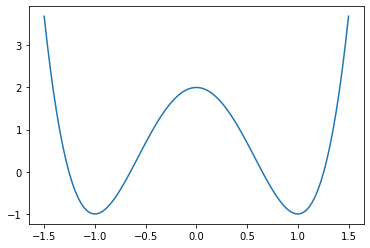

In [4]:
x = np.linspace(-1.5, 1.5, 100)
y = eval('3*x**4 - 6*x**2 + 2')

plt.plot(x, y)
plt.show()

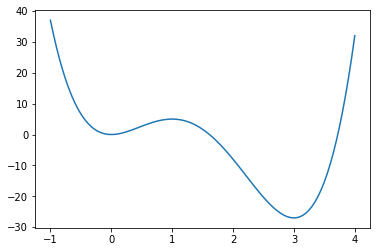

In [5]:
x = np.linspace(-1, 4, 100)
y = eval('3*x**4 - 16*x**3 + 18*x**2')

plt.plot(x, y)
plt.show()

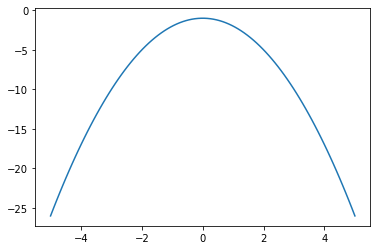

In [6]:
x = np.linspace(-5, 5, 100)
y = eval('-1*x**2 -1')

plt.plot(x, y)
plt.show()

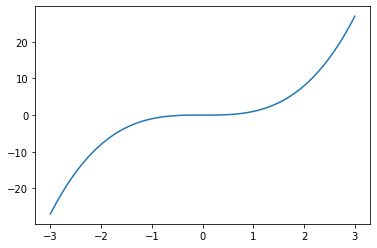

In [7]:
x = np.linspace(-3, 3, 100)
y = eval('x**3')

plt.plot(x, y)
plt.show()

### 0.2.4 Gradient Descent Algorithm in One Variable

The gradient descent algorithm is an algorithm for finding the local minima of a differentiable function $y = f(x)$.

## Algorithm: Gradient Descent

> 1. Initiate the algorithm with a guess $x_0$ as to the local minimum.

${\bf{\text{for }}} i = 0, 1, 2 \ldots {\bf{\text{ do:}}}$

> 2. Calculate $f'(x_i)$.

> 3. Generate the next point in the sequence $x_{i+1} = x_i - \eta f'(x_i)$.

The hope is that the sequence $x_0, x_1, x_2, \ldots$ converges to a local minimum.

*The gradient descent is a simple algorithm that utilises the following facts.*

- If $f$ is strictly locally convex in the neighbourhood $B = (b_0, b_1)$ and $f'(b_0) < 0 < f'(b_1)$, then $f$ has exactly one local minimum $m$ in $B$, conversely, if $f$ has an isolated local minimum at $m$, then $f$ is strictly locally convex in some neighbourhood $B$ of $m$.  
- In $B$, on the right-hand-side of $m$, the shift $-f'(x_i)$ is negative, that is, in the direction of $m$ and the nearer a point is to $m$, the smaller the gradient of $f$ at that point.  
- In $B$, on the left-hand-side of $m$, the shift $-f'(x_i)$ is positive, that is, in the direction of $m$ and the nearer a point is to $m$, the greater the gradient of $f$ at that point.

Remember that the gradient of $f$ at $m$ is zero.

These facts are visualisable in the above depiction of the function $f(x) = x^2 + 1$ with its tangent lines.

*Conditions under which the sequence generated by the gradient descent algorithm always converges.*

If $f$ is strictly locally convex and $f'$ is locally Lipschitz continuous (see aside) in some open region $B = (b_0, b_1)$, where $f'(b_0) < 0 < f'(b_1)$, then, provided that $x_0 \in B$ and that the constant $\eta$ is sufficiently small, the sequence $x_0, x_1, x_2, \ldots$ converges to the unique local minimum $m$ contained in $B$ from the direction of $x_0$.

*Why?*

Assume without loss of generality that $m = 0$ and $x_0 > 0$ and that $\eta$ is sufficiently small to give $x_1 > 0$.
If $x_i > 0$, then $f'(x_i) > 0$ and by local Lipschitz continuity 
$$
|f'(x_i)| \leq K|x_i|; \text{ in fact } 0 < \frac{f'(x_i)}{K(x_i)} \leq 1.
$$
If $\eta < \frac{1}{K}$, then $0 < \eta \frac{f'(x_i)}{x_i} < 1$ and 
$$
x_{i+1} = x_i(1 - \eta \frac{f'(x_i)}{x_i});
$$
hence, $0 < x_{i+1} < x_i$ meaning that $x_i$ converges to $a \in [0, x_0)$, but if $a \neq 0$ then $x_i$ converges to both $a$ and $a - \eta f'(a)$ but $a - \eta f'(a) < a$, a contradiction.

*However!*

Convergence can still occur if these conditions are not satisfied!

**Note** :- The gradient descent algorithm can be applied to any function for which the derivative at a point is calculable (even a function without a local minimum), so it is no surprise that convergence is a hope and not a certainty (even if $f$ is perfectly suited to gradient descent, suitable values of $x_0$ and $\eta$ are required).
The sequence can converge, oscillate or diverge.
Even if the sequence converges to a point, there is a possibility that it is a saddle point or a local minimum that is globally comparatively large.

*Examples*

- The function $f(x) = x^2 + 1$ is globally strictly convex and its derivative $f'(x) = 2x$ is locally Lipschitz continuous, so it is a perfect function to which to apply the gradient descent algorithm, however, the value $x_0$ and the constant $\eta$ are still important, as can be seen in the output of the code below.
Starting from $x_0 = 1$ if $\eta = 0.001$ the convergence is slow, if $\eta = 1$ the sequence oscillates, and if $\eta = 0.1$ the convergence is good.

- The function $f(x) = 3x^4 - 6x^2 + 2$ is strictly convex in a neighbourhood $B_0$ of the points $x=1$ and its derivative $f'(x) = 12x^3 - 12x$ is locally Lipschitz continuous in a neighbourhood $B1$ of $x=1$, so if 
$x_0$ is in $B_0 \cap B1$ and $\eta$ is sufficiently small, then the sequence converges to the local minimum at $x=1$; similarly, for the local minimum at $x=-1$.
Starting from $x_0 = 2$, if $\eta = 0.1$ the sequence diverges, and if $\eta = 0.01$ the sequence converges.
Starting from $x_0 = 0.1$ (not inside $B$), if $\eta = 0.01$ the sequence still converges.

- The function $f(x) = x^3$ is strictly convex and its derivative $f'(x) = 3x^2$ is locally Lipschitz continuous in the region $(0, -\infty)$, so the sequence generated by the gradient descent algorithm will still converge for $x_0=1$ and $\eta = 0.1$; however, it will converge to the point at $x=0$, which is a saddle point, not a local minimum, as can be seen in the code below.

**Aside** :- *Locally Lipschitz Continuous*

A function $f: \mathbb{R} \rightarrow \mathbb{R}$ given by $y = f(x)$ is locally Lipschitz continuous in some open region $B = (b_0, b_1)$ if there exists a non-negative constant $K$ such that $|f(x_1) - f(x_2)| \leq K |x_1 - x_2|$ for all $x_1, x_2 \in B$.
The function is globally Lipschitz continuous if this condition is true for all $x_1, x_2 \in \mathbb{R}$.

In [8]:
def GD(x, eta, expression, iterations):
    for i in range(iterations):
        dy_dx = eval(expression)
        x -= eta*dy_dx
        print(x)

In [9]:
# f(x) = x**2 + 1
# f'(x) = 2*x

GD(1, 0.001, '2*x', 10)
print()
GD(1, 1, '2*x', 5)
print()
GD(1, 0.1, '2*x', 10)

0.998
0.996004
0.994011992
0.992023968016
0.990039920079968
0.9880598402398081
0.9860837205593285
0.9841115531182099
0.9821433300119734
0.9801790433519495

-1
1
-1
1
-1

0.8
0.64
0.512
0.4096
0.32768
0.26214400000000004
0.20971520000000005
0.16777216000000003
0.13421772800000004
0.10737418240000003


In [10]:
# f(x) = 3*x**4 - 6*x**2 + 2, 
# f'(x) = 12*x**3 - 12*x

GD(2, 0.1, '12*x**3 - 12*x', 5)
print()
GD(2, 0.01, '12*x**3 - 12*x', 20)
print()
GD(0.1, 0.01, '12*x**3 - 12*x', 20)
print()

-5.2
157.2896
-4669271.055749896
1.221598536326226e+20
-2.1875941691447127e+60

1.28
1.18194176
1.125635994257337
1.0895629998359264
1.065093916852137
1.0479128802695807
1.0355741582199356
1.026575370403076
1.0199407791303592
1.0150108921596146
1.0113267544803675
1.0085619726925235
1.0064806332721277
1.0049101291267692
1.0037230045582364
1.002824487397159
1.002143735735421
1.0016275835596637
1.001236009337795
1.0009388168912612

0.11188000000000001
0.12513754996039936
0.1399189063854081
0.15638046701682645
0.17468721174647167
0.1950099944865167
0.2175212720033604
0.24238876921579666
0.269766513350266
0.2997826572785043
0.33252361295564453
0.36801431226704107
0.4061950081111457
0.4468960216368737
0.48981326702623973
0.5344891133705623
0.5803047539906234
0.6264909581465223
0.6721628315718864
0.7163801596179774



In [11]:
# f(x) = x**3, 
# f'(x) = 3*x**2

GD(1, 0.1, '3*x**2', 20)
print()

0.7
0.5529999999999999
0.4612573
0.397429810959013
0.3500446745673379
0.31328529230945185
0.28384098999622626
0.25967127771561493
0.23944252597447693
0.22224270900096552
0.20742516248973916
0.19451760307957075
0.18316647370722433
0.17310148658012253
0.16411224918324802
0.15603240008365266
0.14872856712089313
0.14209251111754292
0.1360354266028362
0.13048373541553152



### 0.2.5 Multivariable Gradient Descent Algorithm

As with a function in one variable a local minimum (or local minimum point) is a point 
$({\bf{a}} = (a_0, a_1, \ldots, a_{n-1}), f({\bf{a}}))$ of a function 
$y = f({\bf{x}} = (x_0, x_1, \ldots, x_{n-1}))$ that satisfies $f({\bf{a}}) \leq f({\bf{x}})$ for all ${\bf{x}}$ in some neighbourhood of ${\bf{a}}$.

At such a point $\frac{\partial y}{\partial x_i} \bigg|_{\bf{a}} = 0$ for all $i = 0,1,\ldots$, so at the point $(\bf{a},f({\bf{a}}))$ the gradient of $f$ is zero along each of the $n$ axes, as it is in the one variable case.

If the function $y = f({\bf{x}})$ is differentiable, then the gradient of $f$, denoted $\nabla f$, is the column vector
$$
\nabla f 
=
\begin{bmatrix}
\frac{\partial y}{\partial x_0} \\
\frac{\partial y}{\partial x_1} \\
\vdots \\
\frac{\partial y}{\partial x_{n-1}}
\end{bmatrix}
$$
and at a point $({\bf{a}}, f({\bf{a}}))$ it is the vector the elements of which are the gradients of $f$ at $({\bf{a}}, f({\bf{a}}))$ along the $n$ axes; that is,
$$
\nabla f ({\bf{a}})
=
\begin{bmatrix}
\frac{\partial y}{\partial x_0} ({\bf{a}}) \\
\frac{\partial y}{\partial x_1} ({\bf{a}}) \\
\vdots \\
\frac{\partial y}{\partial x_{n-1}} ({\bf{a}})
\end{bmatrix}.
$$

The multivariable version of the gradient is as follows.

## Algorithm: Gradient Descent

> 1. Initiate the algorithm with a guess ${\bf{x}}_0$ as to the local minimum.

${\bf{\text{for }}} j = 0, 1, 2 \ldots {\bf{\text{ do:}}}$

> 2. Calculate $\nabla({\bf{x}}_j)$.

> 3. Generate the next point in the sequence ${\bf{x}}_{j+1} = {\bf{x}}_j - \eta \nabla ({\bf{x}}_j)$.

The hope is that the sequence ${\bf{x}}_0, {\bf{x}}_1, {\bf{x}}_2, \ldots$ converges to a local minimum.

*Conditions under which the sequence generated by the gradient descent algorithm always converges.*

There are multivariable versions of convexity and Lipschitz continuity and as with the one variable case if $y = f({\bf{x}})$ is strictly convex and $\nabla f$ is Lipschitz continuous in some open region $B = \times_{i=0}^{n-1} B_i$, then, provided that 
${\bf{x}}_0 \in B$ and $\eta$ is sufficiently small, the sequence ${\bf{x}}_0, {\bf{x}}_1, {\bf{x}}_2, \ldots$ converges to the unique local minimum ${\bf{m}}$ in $B$ from the direction of ${\bf{x}}_0$.

*The reason is beyond the level of mathematics that is assumed and would require far more detail.*  
...

**Note:-**
As with the one variable case convergence is still a hope in the multivariable case, because everything that can go wrong in the former can go wrong in the latter.

### 0.2.6 Chain Rule in One Variable

The function $y = (f \circ g)(x)$ defined by $y = f(g(x))$ is the composite of two functions, $y = f(z)$ and $z = g(x)$.
The chain rule states that the derivate of $y = (f \circ g)(x)$ is 
$$
(f \circ g)'(x) = g'(x)f'(g(x));
$$
that is,
$$
\frac{dy}{dx} = \frac{dy}{dz} \cdot \frac{dz}{dx},
$$
or
$$
\frac{dy}{dx} = \frac{dy}{dz} \bigg|_{z(x)} \cdot \frac{dz}{dx},
$$
in terms of $x$, note $y(x)$ is $y$ in terms of $x$.

*Example*

If $y = f(z) = z^4 + 1$ and $z = g(x) = (x^2+1)$, then $\frac{dy}{dz} = 4z^3$, $\frac{dz}{dx} = 2x$ and by the chain rule
$$
\begin{align}
\frac{dy}{dx} &= \frac{dy}{dz} \cdot \frac{dz}{dx} \\
&= 4z^3 \cdot 2x \\
&= 4(x^2+1)^3 \cdot 2x = 8x(x^2+1)^3.
\end{align}
$$

*Repeated application of the chain rule*

If $y = f \circ (g \circ h) = f(g(h(x)))$ is the composite of three functions $y = f(u)$, $u = g(v)$ and $v = h(x)$, then to calculate $\frac{dy}{dx}$ apply the chain rule twice, as follows: by the chain rule
$$
\frac{dy}{dv} = \frac{du}{dv} \cdot \frac{dy}{du}
$$
and as $y = f(g(v))$ in terms of $v$ and $v = h(x)$ then by the chain rule
$$
\begin{align}
\frac{dy}{dx} &= \frac{dv}{dx} \cdot \frac{dy}{dv} \\
&= \frac{dv}{dx} \cdot \frac{du}{dv} \cdot \frac{dy}{du}
\end{align}
$$
or 
$$
\frac{dy}{dx} = \frac{dv}{dx} \cdot \frac{du}{dv} \bigg|_{v(x)} \cdot \frac{dy}{du} \bigg|_{u(x)}
$$
in terms of $x$, where $v(x)$ and $u(x)$ are $u$ and $v$ in terms of $x$, that is, $h(x)$ and $g(h(x))$.

In general if 
$y = f_0 \circ (f_1 \circ (f_2 \circ \cdots (f_{n-2} \circ f_{n-1}) \cdots ))(x) =
f_0(f_1(f_2( \cdots f_{n-2}(f_{n-1}(x) \cdots ))$
is the composite of $n$ functions $y = f_0(u_0)$, $u_0 = f_1(u_1)$, $u_1 = f_2(u_2)$, $\ldots$, $u_{n-2} = f_{n-1}(x)$, then applying the chain rule $n-1$ times and substituting in $u_i(x)$, for all $i = 0,1,\ldots,n-2$, gives
$$
\frac{dy}{dx} = \frac{du_{n-2}}{dx} \cdot \frac{du_{n-3}}{du_{n-2}} \bigg|_{u_{n-2}(x)} \cdot \ \cdots \ \cdot \frac{du_0}{du_1} \bigg|_{u_1(x)} \cdot \frac{dy}{du_0} \bigg|_{u_0(x)}.
$$

### 0.2.7 Multivariable Chain Rule

For the composite function $y = f(z_0, z_1, \ldots z_{m-1})$, where $z_i = g_i(x)$ for all $i = 0, 1, \ldots, m-1$, the multivariable chain rule states that
$$
\frac{dy}{dx} = \sum_{i=0}^{m-1} \frac{d z_i}{dx} \cdot \frac{\partial y}{\partial z_i}
$$
or
$$
\frac{dy}{dx} = \sum_{i=0}^{m-1} \frac{d z_i}{dx} \cdot \frac{\partial y}{\partial z_i} \bigg|_{z_i(x)}
$$
in terms of $x$.

If $z_i = g_i(x)$ is replaced with $z_i = g_i(x_0, x_1, \ldots, x_{n-1})$, then
$$
\frac{\partial y}{\partial x_j} = \sum_{i=0}^{m-1} \frac{\partial z_i}{\partial x_j} \cdot \frac{\partial y}{\partial z_i}
$$
for all $j = 0, 1, \ldots, n-1$.

*Repeating the multivariable chain rule*

Generalise the notation, and consider the composite function 
$$
y = f(x_0^{(0)}, x_1^{(0)}, \ldots, x_{n_0-1}^{(0)}),
$$
where 
$$
x_{i_0}^{(0)} = f_{i_0}^{(0)}(x_0^{(1)}, x_1^{(1)}, \ldots, x_{n_1-1}^{(1)})
$$
for all $i_0 = 0, 1, \ldots, n_0-1$.  
By the multivariable chain rule the partial derivative of $y$ with respect to $x_{i_1}^{(1)}$ is 
$$
\frac{\partial y}{\partial x_{i_1}^{(1)}} = \sum_{i_0 = 0}^{n_0-1} \frac{\partial x_{i_0}^{(0)}}{\partial x_{i_1}^{(1)}}
\cdot
\frac{\partial y}{\partial x_{i_0}^{(0)}}.
$$
If 
$$
x_{i_1}^{(1)} = f_{i_1}^{(1)}(x_0^{(2)}, x_1^{(2)}, \ldots, x_{n_2-1}^{(2)})
$$
for all $i_1 = 0, 1, \ldots, n_1-1$, then substituting
$$
x_{i_0}^{(0)} = f_{i_0}^{(0)}(x_0^{(1)}, x_1^{(1)}, \ldots, x_{n_1-1}^{(1)})
$$
into 
$$
y = f(x_0^{(0)}, x_1^{(0)}, \ldots, x_{n_0-1}^{(0)}),
$$
for all $i_0 = 0,1,\ldots,n_0-1$, gives $y$ in terms of $x_{i_1}^{(1)}$ for all $i_1 = 0,1,\ldots,n_1-1$;
therefore, by the multivariable chain rule the partial derivative of $y$ with respect to $x_{i_2}^{(2)}$ is 
$$
\frac{\partial y}{\partial x_{i_2}^{(2)}} = \sum_{i_1 = 0}^{n_1-1} \frac{\partial x_{i_1}^{(1)}}{\partial x_{i_2}^{(2)}}
\cdot
\frac{\partial y}{\partial x_{i_1}^{(1)}}.
$$
Repeat $N-3$ times to get 
$$
\frac{\partial y}{\partial x_{i_{N-1}}^{(N-1)}} = \sum_{i_{N-2} = 0}^{n_{N-2}-1} \frac{\partial x_{i_{N-2}}^{(N-2)}}{\partial x_{i_{N-1}}^{(N-1)}}
\cdot
\frac{\partial y}{\partial x_{i_{N-2}}^{(N-2)}}.
$$

*Neural Networks*

To train a neural network using the gradient descent algorithm it is necessary to find the partial derivatives of such a composite function with respect to $x_i^{(j)}$ for all relevant $i$ and $j$.
This is achieved through an algorithm called backpropagation that makes use of such a repetition of the multivariable chain rule.

For a given point, where the value of $\frac{\partial y}{\partial x_{i_0}^{(0)}}$ is known for all $i_0 = 0,1,\ldots,n_0-1$ and the value of $\frac{\partial x_{i_{j}}^{(j)}}{\partial x_{i_{j+1}}^{(j+1)}}$ is known for all relevant $j$, the value of $\frac{\partial y}{\partial x_{i_1}^{(1)}}$ is calculable by substituting the known values of $\frac{\partial y}{\partial x_{i_0}^{(0)}}$ and $\frac{\partial x_{i_0}^{(0)}}{\partial x_{i_1}^{(1)}}$ into the equation
$$
\frac{\partial y}{\partial x_{i_1}^{(1)}} = \sum_{i_0 = 0}^{n_0-1} \frac{\partial x_{i_0}^{(0)}}{\partial x_{i_1}^{(1)}}
\cdot
\frac{\partial y}{\partial x_{i_0}^{(0)}}
$$
for all $i_1 = 0,1,\ldots,n_1-1$.  
This process is repeated until the value of $\frac{\partial y}{\partial x_{i_{N-1}}^{(N-1)}}$ is calculated for all
$i_{N-1} = 0,1,\ldots,n_{N-1}-1$.

## 1 Feedforward Artificial Neural Networks

**Contents of Section 1**

- Section 1.1 Activation Functons
- Section 1.2 Artificial Neurons
 - Section 1.2.1 Bias
 - Section 1.2.2 Notation
 - Section 1.2.3 Graphical Representation
 - Section 1.2.4 Vector Representation
 - Section 1.2.5 Example
 - Section 1.2.6 Computing a Layer of Activations in Python
- Section 1.3 Structure of a Feedforward Artificial Neural Network
 - Section 1.3.1 Initialisation
 - Section 1.3.2 Feedforward Pass
 - Section 1.3.3 Representation of a Feedforward Artificial Neural Network in Python
 - Section 1.3.4 Example 2
- Section 1.4 Cost Function
- Section 1.5 Gradient Descent
 - Section 1.5.1 The Theory Behind the Gradient Descent Algorithm
 - Section 1.5.2 Alternative Versions of Gradient Descent
   - Section 1.5.2.1 Stochastic Gradient Descent
   - Section 1.5.2.2 Min-Batch Gradient Descent
- Section 1.6 Backward Propagation
 - Section 1.6.1 Notation
 - Section 1.6.2 The Backward Propagation Algorithm
   - Section 1.6.2.1 Step 1. Calculating the Partial Derivative of $C(W, B, X, y)$ with respect to the Weights
   - Section 1.6.2.2 Step 2. Calculating the Partial Derivative of $C(W, B, X, y)$ with respect to the Biases
   - Section 1.6.2.3 Step 3. Calculating the Partial Derivative of $C(W, B, X, y)$ with respect to the Activations
 - Section 1.6.3 Notation
 - Section 1.6.4 The Derivative of the Activation Function
 - Section 1.6.5 Calculating the Partial Derivative of $C(W, B)$ for all Weights and Biases
- Section 1.7 Representation of Gradient Descent with Backward Propagation in Python
- Section 1.8 Worked Example

**Overview of Section 1**

Section 1 starts by introducing the concept of activation functions that are used to calculate the output of artificial neurons that are the key components of an artificial neural network (ANN) which will be introduced and fully explained in Section 1.2 and Section 1.3 respectively.
Only supervised learning is considered here, so the ANN receives its input in the form of an input vector $X$ and its output will be compared to the target vector $y$ using the cost function as detailed in Section 1.4.
Training the network requires minimising the cost function which is done here with the gradient descent algorithm using the backward propagation algorithm to calculate the gradients as detailed in Section 1.5 and Section 1.6 respectively.
These ideas are combined in code in Section 1.7.
The Sciket-Learn digits example is worked through in Section 1.8, which includes preprocessing, training the ANN created in Sections 1.3.3 and 1.7 with the three principle gradient descent methods and testing each.





### 1.1 Activation Functions

An *Activation Function* is a function the output of which changes state or crosses some threshold when its input changes state or crosses some threshold.   
In Artificial Neural Networks the most common activation functions are the identity function, the Rectified Linear Unit (rectifier or ReLU), the sigmoid function and the hyperbolic tangent function.  

The identity function is defined by 
$$
\rm{I}(x) = x
$$
and its output changes from a negative state for $x < 0$ to a positive state for $x > 0$.  
The rectified linear unit is defined by 
$$
\rm{ReLU}(x) = \rm{max}(0,x)
$$
and its output changes from a positive state for $x > 0$ to $0$ for $x \leq 0$.  
The sigmoid function is defined by
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$
and its output ranges from $0$ to $1$ and changes state from the state $\sigma(x) < \frac{1}{2}$ for $x < 0$ to $\sigma(x) > \frac{1}{2}$ for $x > 0$.  
The hyperbolic tangent function is defined by
$$
\rm{tanh}(x) = 2 \sigma(2x) - 1
$$
and its output ranges from $-1$ to $1$ and changes state from the state $\rm{tanh}(x) < 0$ for $x < 0$ to $\rm{tanh}(x) > 0$ for $x > 0$.  

These functions are written as follows in Python.

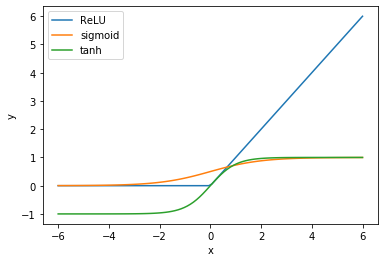

In [12]:
def ReLU(x):
    return np.maximum(0,x)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

x = np.linspace(-6, 6, 100)
y1 = ReLU(x)
y2 = sigmoid(x)
y3 = tanh(x)

plt.plot(x,y1, label="ReLU")
plt.plot(x,y2, label="sigmoid")
plt.plot(x,y3, label="tanh")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 1.2 Artificial Neurons

An *Artificial Neuron, Node or Unit* is a function that takes a set of inputs, applies an activation function to their weighted sum and returns a single value, which is called the node's activation.
If the activation is confined to $0$ and $1$ as would be the case with a binary step activation function, then the node is called a *Perceptron*, but for later purposes, namely Gradient Descent, only continuous activations are considered.

An *Artificial Neural Network* is a collection of nodes organised into a sequence of layers with connections representing the flow of information between nodes.
The type of artificial neural network under consideration here is the *Fully Connected Feedforward Neural Network*, such a network is characterised by the fact that information flows through the network in one direction only; that is, from the $L$-th layer to the $(L+1)$-th layer for all $L$.
Fully connected indicates that the set of inputs received by a node in the $(L+1)$-th layer of the network is the complete set of  activations of the nodes in the $L$-th layer and the output of a further node, the $L$-th *Bias Node*, that is always the value $+1$; therefore, if the $L$-th layer possesses $n$ nodes, then every node in the $(L+1)$-th layer receives a set of $n+1$ inputs consisting of the $n$ activations returned by the $L$-th layer, one for each node, and the value $+1$.  

The weight assigned to the output of the $k$-th node in the $L$-th layer by the $j$-the node in the $(L+1)$-th is denoted by $w_{j k}^{(L)}$.





### 1.2.1 Bias

The weight assigned to the input value $1$ is called *The Bias* and the bias of the $j$-th node in the $(L+1)$-th layer is denoted by $b_j^{(L)}$.
The hyperplane 
$$
\sum_{\forall k} x_k w_{j k}^{(L)} = 0
$$
passes through the origin; therefore, the bias is added to remove this restriction and allow hyperplanes that do not pass through the origin.  





### 1.2.2 Notation

The output of the $j$-th node of the $i$-th layer is denoted by $a_{j}^{(L)}$.

The weighted sum of the set of inputs of the $j$-th node of the $(L+1)$-th layer is denoted by
$$
z_j^{(L+1)} = b_j^{(L)} + \sum_{k=0}^{n_L - 1} w_{j k}^{(L)} a_k^{(L)},
$$
so its output is $a_j^{(L+1)} = f(z_j^{(L+1)})$, where $f$ is the activation function and $n_L$ is the number of nodes in the $L$-th layer.  





### 1.2.3 Graphical Representation

A node of this type is represented graphically in Image 1.

### Image 1

<img src="NNEx1fNodeL.png">





### 1.2.4 Vector Representation

Let $A^{(L)}$ be the column vector the elements of which are the activations of the $L$-th layer and let $W_j^{(L)}$ be the row vector the elements of which are the weights assigned to the activations of the $L$-th layer by the $j$-th node in the $(L+1)$-th layer, then 
$$
a_j^{(L+1)} = f(z_j^{(L+1)})
=
f\big(b_j^{(L)} + \sum_{k = 0}^{n_L - 1} a_k^{(L)} w_{j k}^{(L)}\big)
=
f\big(b_j^{(L)} +
\begin{pmatrix}
w_{j, 0}^{(L)} &
w_{j, 1}^{(L)} &
w_{j, 2}^{(L)} &
\dots &
w_{j, n_L - 1}^{(L)}
\end{pmatrix}
\begin{pmatrix}
a_0^{(L)} \\
a_1^{(L)} \\
a_2^{(L)} \\
\vdots \\
a_{n_L - 1}^{(L)}
\end{pmatrix}\big)
=  f(b_j^{(L)} + W_j^{(L)} A^{(L)}).
$$

Further, let $W^{(L)}$ be the matrix with rows $W_0^{(L)}, W_1^{(L)}, W_2^{(L)}, \ldots, W_{n_{L+1}-1}^{(L)}$, then $A^{(L+1)}$ is calculated as follows:
$$
\begin{align}
A^{(L+1)}
&=
\begin{pmatrix}
f(b_0^{(L)} + \sum_{k = 0} a_k^{(L)} w_{0, k}^{(L)}) \\
f(b_1^{(L)} + \sum_{k = 0} a_k^{(L)} w_{1, k}^{(L)}) \\
f(b_2^{(L)} + \sum_{k = 0} a_k^{(L)} w_{2, k}^{(L)}) \\
\vdots \\
f(b_{n_{L+1}-1}^{(L)} + \sum_{k = 0} a_k^{(L)} w_{n_{L+1}-1, k}^{(L)})
\end{pmatrix} \\
&= 
f\Bigg(
\begin{pmatrix}
b_0^{(L)} \\
b_1^{(L)} \\
b_2^{(L)} \\
\vdots \\
b_{n_{L+1}-1}^{(L)}
\end{pmatrix}
+
\begin{pmatrix}
w_{0, 0}^{(L)} & w_{0, 1}^{(L)} & w_{0, 2}^{(L)} \dots w_{0, n_L - 1}^{(L)} \\
w_{1, 0}^{(L)} & w_{1, 1}^{(L)} & w_{1, 2}^{(L)} \dots w_{1, n_L - 1}^{(L)} \\
w_{2, 0}^{(L)} & w_{2, 1}^{(L)} & w_{2, 2}^{(L)} \dots w_{2, n_L - 1}^{(L)} \\
\vdots \\
w_{n_{L+1}-1, 0}^{(L)} & w_{n_{L+1}-1, 1}^{(L)} & w_{n_{L+1}-1, 2}^{(L)} \dots w_{n_{L+1}-1, n_L - 1}^{(L)}
\end{pmatrix}
\begin{pmatrix}
a_0^{(L)} \\
a_1^{(L)} \\
a_2^{(L)} \\
\vdots \\
a_{n_L - 1}^{(L)}
\end{pmatrix}
\Bigg) \\
&= f(B^{(L)} + W^{(L)} A^{(L)}) = f(Z^{(L+1)})
\end{align}
$$

where $B^{(L)} = (b_0^{(L)}, b_1^{(L)}, b_2^{(L)}, \ldots b_{n_{L+1}-1}^{(L)})^T$
and $Z^{(L+1)} = (z_0^{(L+1)}, z_1^{(L+1)}, z_2^{(L+1)}, \ldots z_{n_{L+1}-1}^{(L+1)})^T$.





### 1.2.5 Example

Let the $L$-th layer of a network possess $5$ nodes and let those $5$ nodes return the values $a_0^{(L)} = 0.501$, $a_1^{(L)} = 0.248$, $a_2^{(L)} = 0.115$, $a_0^{(L)} = 0.288$ and $a_0^{(L)} = 0.657$, respectively.
Therefore, the $j$-th node in the $(L+1)$-th layer receives the set of inputs $\{0.501, 0.248, 0.115, 0.288, 0.657, 1\}$ and applies the activation function (assume that ReLU is used) to their weighted sum
$$
z_j^{(L+1)} = 0.501 w_{j 0}^{(L)} + 0.248 w_{j 1}^{(L)} + 0.115 w_{j 1}^{(L)} + 0.288 w_{j 1}^{(L)} + 0.657 w_{j 1}^{(L)} + b_j^{(L)}
$$
and returns the result; that is, it returns
$$
\rm{ReLU}(z_j^{(L+1)}) = 
\rm{max}(0, 0.501 w_{j 0}^{(L)} + 0.248 w_{j 1}^{(L)} + 0.115 w_{j 1}^{(L)} + 0.288 w_{j 1}^{(L)} + 0.657 w_{j 1}^{(L)} + b_j^{(L)}).
$$
This node is represented graphically in Image 2.

### Image 2

<img src="NNEx1ReLUNodeL.png">

The calculation of the activation is written in vector form as follows:

$$
a_j^{(L+1)} = \rm{ReLU} (z_j^{(L+1)}) =  \rm{ReLU} (b_j^{(L)} + W_j^{(L)} A^{(L)})
=
\rm{ReLU} \big(b_j^{(L)} +
\begin{pmatrix}
w_{j 0}^{(L)} &
w_{j 1}^{(L)} &
w_{j 2}^{(L)} &
w_{j 3}^{(L)} &
w_{j 4}^{(L)}
\end{pmatrix}
\begin{pmatrix}
0.501 \\
0.248 \\
0.115 \\
0.288 \\
0.657
\end{pmatrix}
\big)
=
\rm{ReLU} \big(b_j^{(L)} + 0.501 w_{j 0}^{(L)} + 0.248 w_{j 1}^{(L)} + 0.115 w_{j 1}^{(L)} + 0.288 w_{j 1}^{(L)} + 0.657 w_{j 1}^{(L)}\big).
$$





### 1.2.6 Computing a Layer of Activations in Python

Extend Example 1 to generate the activations of every node in the $(L+1)$-th layer.

First assume that the $(L+1)$-th layer possesses $8$ nodes.
As $A^{(L)}$ will be represented as a row vector in NumPy, that is, a NumPy array of shape $(1,n_L)$ the transposed equation
$$
(A^{(L+1)})^T = f((Z^{(L+1)})^T) = f((B^{(L)})^T + (A^{(L)})^T (W^{(L)})^T)
$$
is used in place of 
$$
A^{(L+1)} = f(Z^{(L+1)}) = f(B^{(L)} + W^{(L)} A^{(L)}).
$$
Perform the calculation to determine the activations of the $(L+1)$-th layer in Python as follows.

In [13]:
W_L = 2*np.random.random((5,8))-1 # (W^{(L)})^T
print("W_L.shape = ", W_L.shape)
print()

B_L = 2*np.random.random((1,8))-1 # (B^{(L)})^T
print("B_L.shape = ", B_L.shape)
print()

A_L = np.array([[0.501, 0.248, 0.115, 0.288, 0.657]]) # (A^{(L)})^T
print("A_L.shape = ", A_L.shape)
print()

Z_L_1 = B_L + np.matmul(A_L, W_L) # (Z^{(L+1)})^T = (B^{(L)})^T + (A^{(L)})^T (W^{(L)})^T
print("Z_L_1 = ")
print(Z_L_1)
print("Z_L_1.shape = ", Z_L_1.shape)
print()

A_L_1 = ReLU(Z_L_1) # (A^{(L+1)})^T = f((Z^{(L+1)})^T)
print("A_L_1 = ")
print(A_L_1)
print("A_L_1.shape = ", A_L_1.shape)

W_L.shape =  (5, 8)

B_L.shape =  (1, 8)

A_L.shape =  (1, 5)

Z_L_1 = 
[[ 0.75318796  0.73385401 -0.93759982 -0.27173855  0.98125529 -1.18561565
  -0.0506199  -1.5007594 ]]
Z_L_1.shape =  (1, 8)

A_L_1 = 
[[0.75318796 0.73385401 0.         0.         0.98125529 0.
  0.         0.        ]]
A_L_1.shape =  (1, 8)


### 1.3 Structure of a Feedforward Artificial Neural Network

As only supervised learning is considered here, label the input vector $X$ and the corresponding target vector $y$.
If the networks input vector is $X = (x_0, x_1, \ldots, x_{n_0 - 1})$, then the sole input of the $k$-th node in the $0$-th layer or *Input Layer* is the value $x_k$ and there are exactly $n_0$ nodes in the input layer, one for each feature of the input vector.
If $y = ( y_0, x_1, \ldots, y_{n_{N-1}-1} )$ is the corresponding target vector, then the output of the $j$-th node in the 
$(N-1)$-th or *Output Layer* is the value $\bar{y}_j$, which is to be compared with $y_j$, and there are exactly $n_{N-1}$ nodes in the output layer, one for each feature of the target vector.
Every layer between the input layer and the output layer is called a *Hidden Layer*.  

When combined with the description of nodes and layers in Section 1.2 it follows that a feedforward neural network is a *Directed Acyclic Graph*, where a directed edge (or connection) from the $k$-th node in the $L$-th layer to the $j$-th node in the $(L+1)$-th layer indicates that $a_k^{(L)}$ is in the input set of the $j$-th node in the $(L+1)$-th layer; this edge is typically labelled with the weight $w_{j k}^{(L)}$.
In such a graph the nodes without parents (excluding the bias nodes) are the input nodes and the nodes without children are output nodes.

A feedforward neural network with $4$ layers, an input layer with $3$ nodes, a hidden layer with $4$ nodes, a hidden layer with $2$ nodes and an output layer with $2$ nodes is depicted in Image 3.

### Image 3

<img src="FFNN.png">

### 1.3.1 Initialisation

Unless there exist saved weights and biases from previous training, all weights and biases are initialised randomly.





### 1.3.2 Feedforward Pass

The process of passing a given feature set through the network and calculating an output is called a *Feedforward Pass*.
The simplicity of a feedforward pass is demonstrated in the following algorithm.

## Algorithm: Feedforward Pass

${\bf{\text{Input}}}: \ X$

$A^{(0)} := X$

${\bf{\text{for }}} L = 0, 1, 2, \ldots, N-3, N-2, {\bf{\text{do:}}}$

1. Use $A^{(L)}$, $B^{(L)}$ and $W^{(L)}$ to calculate $Z^{(L+1)}$ with the equation
$$
Z^{(L+1)} = B^{(L)} + W^{(L)} A^{(L)}.
$$

2. Use $Z^{(L+1)}$ to calculate $A^{(L+1)}$ with the equation
$$
A^{(L+1)} = f(Z^{(L+1)}),
$$
where $f$ is the activation function.

${\bf{\text{Output}}}: \ A^{(N-1)}$





### 1.3.3 Representation of a Feedforward Artificial Neural Network in Python

- Class *connections* - Represents the weights and biases; in a feedforward pass they are treated like constants in an equation.
- Class *network* - Represents the artificial neural network.
 - Method *add_layer(n)* - Adds a new layer of *n* artificial neurons to the network, by adding a new layer of weights and biases.
 - Method *forward_pass(X)* - Performs a feedforward pass with the input vector (or the input vectors) $X$ and returns $Z$ and $A$, that is the set of all appropriate $(Z^{(L)})^T$ and $(A^{(L)})^T$ for $L = 0, 1, \ldots, N-1$; obviously $(Z^{(0)})^T = \emptyset$.
 Note that for $s$ input vectors all row vectors $(A^{(L)})^T$ are in a Numpy array of shape $(s,n_{L})$ in $A$; similarly for $(Z^{(L)})^T$.

**Note:** The method *forward_pass* is designed to accept an input vector as a NumPy array of shape $(1,n_0)$, for example

$$
X = np.array([[0.298, -0.609, 0.987]])),
$$

where $n_0 = 3$ and $s>1$ input vectors as a NumPy array of shape $(s, n_0)$, for example

$$
S = np.array([[0.298, -0.609, 0.987], [0.390, 0.492, -0.127]])),
$$

where $s = 2$ and $n_0 = 3$.

In [14]:
class connections(object):
    def __init__(self, m, n):
        self._W = 2*np.random.random((m,n))-1 # Weights
        self._B = 2*np.random.random((1,n))-1 # Biases
        
    @property
    def W(self):
        return self._W
    
    @W.setter
    def W(self, W):
        self._W = W
    
    @property
    def B(self):
        return self._B
    
    @B.setter
    def B(self, B):
        self._B = B

In [15]:
class network(object):
    def __init__(self):
        self._nodes_per_layer = []
        self._all_connections = []
    
    def add_layer(self, n):
        if len(self._nodes_per_layer) == 0: # Empty network
            # Input layer
            self._nodes_per_layer.append(n)
        else:
            # Subsequent layers
            WB = connections(self._nodes_per_layer[-1], n)
            self._nodes_per_layer.append(n)
            self._all_connections.append(WB)
    
    def forward_pass(self, X):
        if len(self._nodes_per_layer) != 0: # Not an empty network
            Z = [] # To contain Z^{(0)}^T, Z^{(1)}^T, ..., Z^{(N-1)}^T
            A = [] # To contain Z^{(0)}^T, Z^{(1)}^T, ..., Z^{(N-1)}^T
            Z_L = np.array([]) # Z^{(L)}^T
            A_L = np.copy(X)   # A^{(L)}^T
            Z.append(Z_L)
            A.append(A_L)
            A_L_1 = np.array([]) # A^{(L+1)}^T
            for connections_L in self._all_connections:
                Z_L_1 = connections_L.B + np.matmul(A_L, connections_L.W) # Z^{(L+1)}^T = (B^{(L)})^T + (A^{(L)})^T (W^{(L)})^T
                Z.append(Z_L_1)
                A_L_1 = sigmoid(Z_L_1) # a^{(L+1)}^T = f(Z^{(L+1)}^T)
                A.append(A_L_1)
                A_L = np.copy(A_L_1)
            return Z, A
        else:
            return [], []

### 1.3.4 Example 2

Create *empty_network* an instance of the class *network* without layers and create *example_network* an instance of the class *network* with the layers depicted in image 3.  

Pass the input vector
$$
X = ( 0.298, -0.609, 0.987 )
$$
through the networks.  

Pass the set of $5$ input vectors
$$
\begin{align}
S = \{ &( 0.298, -0.609, 0.987 ), \\
&( 0.390, 0.492, -0.127 ), \\
&( 1.00, -0.60, -0.005 ), \\
&( 0.0, 0.503, 0.114 ), \\
&( -0.718, -0.609, -0.25 ) \}
\end{align}
$$
through the networks.

In [16]:
empty_network = network()

example_network = network()

example_network.add_layer(3)
example_network.add_layer(4)
example_network.add_layer(2)
example_network.add_layer(2)

X = np.array([[0.298, -0.609, 0.987]])

Z, A = empty_network.forward_pass(X)

for i in range(len(Z)):
    print("Z[",i,"]")
    print(Z[i])
print()

for i in range(len(A)):
    print("A[",i,"] =")
    print(A[i])
print()

Z, A = example_network.forward_pass(X)

for i in range(len(Z)):
    print("Z[",i,"] =")
    print(Z[i])
print()

for i in range(len(A)):
    print("A[",i,"] =")
    print(A[i])
print()

S = np.array([[0.298, -0.609, 0.987], [0.390, 0.492, -0.127], 
              [1.00, -0.60, -0.005], [0.0, 0.503, 0.114], [-0.718, -0.609, -0.25]])

Z, A = example_network.forward_pass(S)

for i in range(len(Z)):
    print("Z[",i,"] =")
    print(Z[i])
print()

for i in range(len(A)):
    print("A[",i,"] =")
    print(A[i])
print()



Z[ 0 ] =
[]
Z[ 1 ] =
[[0.13231424 0.60489032 0.14677716 0.96238425]]
Z[ 2 ] =
[[0.69983819 1.00124792]]
Z[ 3 ] =
[[0.715593   1.73752837]]

A[ 0 ] =
[[ 0.298 -0.609  0.987]]
A[ 1 ] =
[[0.53303039 0.64677434 0.53662855 0.72359892]]
A[ 2 ] =
[[0.6681519  0.73130386]]
A[ 3 ] =
[[0.67163583 0.85037285]]

Z[ 0 ] =
[]
Z[ 1 ] =
[[ 0.13231424  0.60489032  0.14677716  0.96238425]
 [ 0.16535526 -0.33803144 -1.07463633  0.16127563]
 [ 0.1806452  -0.3906823  -0.93411668  0.52630241]
 [ 0.04322004  0.04097647 -0.737872    0.15985824]
 [-0.79802045  0.57634176 -0.53293163 -0.51017823]]
Z[ 2 ] =
[[0.69983819 1.00124792]
 [0.64047627 1.04947799]
 [0.58186127 1.07951273]
 [0.71013571 0.99541388]
 [0.95567226 0.70619311]]
Z[ 3 ] =
[[0.715593   1.73752837]
 [0.71738211 1.74472234]
 [0.71883281 1.74838486]
 [0.71532946 1.7367383 ]
 [0.70608524 1.68543963]]

A[ 0 ] =
[[ 0.298 -0.609  0.987]
 [ 0.39   0.492 -0.127]
 [ 1.    -0.6   -0.005]
 [ 0.     0.503  0.114]
 [-0.718 -0.609 -0.25 ]]
A[ 1 ] =
[[0.53303

### 1.4 Cost Function

For a given input vector $X = ( x_0, x_1, \ldots, x_{n_0 - 1} )$, assume that the network returns the vector $\bar{y} = ( \bar{y}_0, \bar{y}_1, \ldots, \bar{y}_{n_{N-1}-1} )$, then the *Cost Function* of the training sample $(X, y)$ is given by
$$
\begin{align}
C(W, B, X, y) &= \frac{1}{2} || y - \bar{y} ||_2^2 \\
&= \frac{1}{2} \sum_{i = 0}^{n_{N-1}-1}  | y_i - \bar{y}_i |^2,
\end{align}
$$
which is $\frac{1}{2}$ of what is called the sum-of-square error (SSE), where $|| \cdot ||_2$ is called the $L^2$-norm or the Euclidean Norm.  

Since the cost function $C(W, B, X, y)$ gives $\frac{1}{2}$ the sum-of-square error for only a single training sample, the *Cost Function* for the whole training set $S$ of $m$ training examples is the average of $C(W, B, X, y)$ over all $(X, y) \in S$; that is,
$$
\begin{align}
C(W, B) &= \frac{1}{m} \sum_{\forall (X,y) \in S} C(W, B, X, y) \\
&= \frac{1}{2m} \sum_{\forall (X,y) \in S}  || y - \bar{y} ||_2^2 \\
&= \frac{1}{2m} \sum_{\forall (X,y) \in S} \sum_{i = 0}^{n_{N-1}-1} | y_i - \bar{y}_i |^2, 
\end{align}
$$
which is $\frac{1}{2}$ of the mean square error (MSE) of the $L^2$-norm over all training samples.

**Note:** There are other possibilities for the cost function, with the only two restrictions being that 
$$
C(W, B) = \frac{1}{m} \sum_{\forall (X,y) \in S} C(W, B, X, y)
$$
and $C(W,B)$ is not dependent on $A^{(L)}$ for $L < N-1$ beyond the dependence of $A^{(N-1)}$ on $A^{(N-2)}$, which is required for backward propagation.

The aim of training a feedforward neural network is to minimise the cost function and one method of achieving this is with the gradient descent algorithm.

### 1.5 Gradient Descent

*Gradient Descent* is the optimisation algorithm that will be used here to minimise the cost function $C(W, B)$.

## Algorithm: Gradient Descent

Let $\bar{w}_{j k}^{(L)}$ and $\bar{b}_j^{(L)}$ denote the current values of the $w_{j k}^{(L)}$ and $b_j^{(L)}$ for all $j$, $k$ and $L$.  

> 1. Generate random values of $\bar{w}_{j k}^{(L)}$ and $\bar{b}_j^{(L)}$ for all $j$, $k$ and $L$.  

${\bf{\text{for }}} epoch = 0, 1, \ldots number\_of\_epochs-1 {\bf{\text{ do:}}}$

> 2. Calculate 
$$
\frac{\partial C(W, B)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
\hspace{10pt} \text{ and } \hspace{10pt}
\frac{\partial C(W, B)}{\partial b_j^{(L)}} \Bigg|_{\bar{W}, \bar{B}};
$$
that is, the partial derivative of $C(W, B)$ with respect to $w_{j k}^{(L)}$ at $(\bar{W}, \bar{B})$ and the partial derivative of $C(W, B)$ with respect to $w_{j k}^{(L)}$ at $(\bar{W}, \bar{B})$ for all $j$, $k$ and $L$.

> 3. Update $\bar{w}_{j k}^{(L)}$ to $\bar{w}_{j k}^{(L)} - \eta \frac{\partial C(W, B)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $j$, $k$ and $L$.  
Update $\bar{b}_j^{(L)}$ to $\bar{b}_j^{(L)} - \eta \frac{\partial C(W, B)}{\partial b_{j}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $j$, $k$ and $L$, where the hyperparameter $\eta$, called the *Learning Rate*, is set between $0$ and $1$.

Each repetition of stages 2 and 3 is called an *Epoch*; similarly, for other gradient descent algorithm.





### 1.5.1 The Theory Behind the Gradient Descent Algorithm

A brief overview of the theory behind the gradient descent algorithm and its prerequisites is presented in Sections 0.2.1 to 0.2.5.
The hope is that the values of $\bar{W}$ and $\bar{B}$ converge to a local minimum of the function $C(W, B)$, and the further hope is that the local minimum is a global minimum.

In practice, if the gradient descent algorithm does not result in convergence, then reducing $\eta$ or trying a new set of initial random values for the weights and biases may work.





### 1.5.2 Alternative Versions of Gradient Descent

The version of gradient descent described above is called *Batch Gradient Descent*; batch gradient descent is characterised by the fact that the updates are made using the cost function $C(W, B)$ and the set of all training samples $S$.
*Stochastic Gradient Descent* and *Mini-Batch Gradient Descent* are versions of the gradient descent algorithm and both will be described here and demonstrated in example 3.
Other gradient based algorithms are described in the very useful post: https://ruder.io/optimizing-gradient-descent/index.html#adagrad





### 1.5.2.1 Stochastic Gradient Descent

In *Stochastic Gradient Descent*, the updates are made for each individual training sample using $C(W, B, X, y)$ in place of $C(W, B)$ as follows.

## Algorithm: Stochastic Gradient Descent

Let $\bar{w}_{j k}^{(L)}$ and $\bar{b}_j^{(L)}$ denote the current values of the $w_{j k}^{(L)}$ and $b_j^{(L)}$ for all $j$, $k$ and $L$.

> 1. Generate random values of $\bar{w}_{j k}^{(L)}$ and $\bar{b}_j^{(L)}$ for all $j$, $k$ and $L$.  

${\bf{\text{for }}} epoch = 0, 1, \ldots number\_of\_epochs-1 {\bf{\text{ do:}}}$

> Shuffle all $(X,y)$ in $S$.

> ${\bf{\text{for all }}} (X,y) \in S \text{(shuffled)} {\bf{\text{ do:}}}$

>> 2. Calculate 
$$
\frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
\hspace{10pt} \text{ and } \hspace{10pt}
\frac{\partial C(W, B, X, y)}{\partial b_j^{(L)}} \Bigg|_{\bar{W}, \bar{B}};
$$
that is, the partial derivative of $C(W, B, X, y)$ with respect to $w_{j k}^{(L)}$ at $(\bar{W}, \bar{B})$ and the partial derivative of $C(W, B, X, y)$ with respect to $w_{j k}^{(L)}$ at $(\bar{W}, \bar{B})$ for all $j$, $k$ and $L$.

>> 3. Update $\bar{w}_{j k}^{(L)}$ to $\bar{w}_{j k}^{(L)} - \eta \frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $j$, $k$ and $L$.  
Update $\bar{b}_j^{(L)}$ to $\bar{b}_j^{(L)} - \eta \frac{\partial C(W, B, X, y)}{\partial b_{j}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $j$, $k$ and $L$.





### 1.5.2.2 Mini-Batch Gradient Descent

In *Mini-Batch Gradient Descent*, the updates are made for subsets of $S$ of a given fixed size $n$, the *batch size*, using $\frac{1}{n} \sum_{\forall (X,y) \in S_i} C(W, B, X, y)$ in place of $C(W, B)$, where $S_i$ is a subset of $S$ of size $n$, as follows.

## Algorithm: Mini-Batch Gradient Descent

Let $\bar{w}_{j k}^{(L)}$ and $\bar{b}_j^{(L)}$ denote the current values of the $w_{j k}^{(L)}$ and $b_j^{(L)}$ for all $j$, $k$ and $L$.

> 1. Generate random values of $\bar{w}_{j k}^{(L)}$ and $\bar{b}_j^{(L)}$ for all $j$, $k$ and $L$. 

${\bf{\text{for }}} epoch = 0, 1, \ldots number\_of\_epochs-1 {\bf{\text{ do:}}}$

> Shuffle all $(X,y)$ in $S$ to get a fresh ordering $S = \{ (X_0,y_0), (X_1,y_1), \ldots, (X_{n-1},y_{n-1}) \}$.

> ${\bf{\text{for }}} i = 0,1,2,\ldots,\lfloor \frac{m}{n} \rfloor {\bf{\text{ do:}}}$

>> $S_i = \{ (X_{mi}, y_{mi}), (X_{mi+1}, y_{mi+1}), \ldots (X_{m(i+1)-1}, y_{m(i+1)-1}) \} \subset S$(shuffled).

>> ${\bf{\text{for all }}} (X,y) \in S_i {\bf{\text{ do:}}}$

>>> 2. Calculate 
$$
\frac{1}{n} \sum_{\forall (X,y) \in S_i} \frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
\hspace{10pt} \text{ and } \hspace{10pt}
\frac{1}{n} \sum_{\forall (X,y) \in S_i} \frac{\partial C(W, B, X, y)}{\partial b_j^{(L)}} \Bigg|_{\bar{W}, \bar{B}};
$$
that is, the partial derivative of $\frac{1}{n} \sum_{\forall (X,y) \in S_i} C(W, B, X, y)$ with respect to $w_{j k}^{(L)}$ at $(\bar{W}, \bar{B})$ and the partial derivative of $\frac{1}{n} \sum_{\forall (X,y) \in S_i} C(W, B, X, y)$ with respect to $w_{j k}^{(L)}$ at $(\bar{W}, \bar{B})$ for all $j$, $k$ and $L$.

>>> 3. Update $\bar{w}_{j k}^{(L)}$ to $\bar{w}_{j k}^{(L)} - \frac{\eta}{n} \sum_{\forall (X,y) \in S_i} \frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $j$, $k$ and $L$.  
Update $\bar{b}_j^{(L)}$ to $\bar{b}_j^{(L)} - \frac{\eta}{n} \sum_{\forall (X,y) \in S_i} \frac{\partial C(W, B, X, y)}{\partial b_{j}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $j$, $k$ and $L$.

### 1.6 Backward Propagation

Backpropagation is the algorithm used to calculate $\frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ and $\frac{\partial C(W, B, X, y)}{\partial b_{j}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}$ for all $i, j$ and $k$.

For a given training sample $(X, y)$ the cost function is

$$
\begin{align}
C(W, B, X, y) &= \frac{1}{2} \sum_{i = 0}^{n_{N-1}-1}  | y_i - \bar{y}_i |^2. \\
&= \frac{1}{2} \sum_{i = 0}^{n_{N-1}-1}  | y_i - a_{i}^{(N-1)} |^2;
\end{align}
$$

therefore, the partial derivative of $C(W, B, X, y)$ with respect to $a_i^{(N-1)}$ is

$$
\frac{\partial C(W, B, X, y)}{\partial a_{i}^{(N-1)}} = a_{i}^{(N-1)} - y_i
$$

for all $i$.





### 1.6.1 Notation

Let $A^{(L)}$, $Z^{(L)}$ and $W^{(L)}$ be as defined in Section 1.2.4 and define $\frac{\partial C(W, B, X, y)}{\partial A^{(L)}}$ to be the column vector the $k$-th element of which is the partial derivative of $C(W, B, X, y)$ with respect to $a_k^{(L)}$ for all $k$; that is, 

$$
\frac{\partial C(W, B, X, y)}{\partial A^{(L)}}
=
\begin{bmatrix}
\frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial a_{n_L - 1}^{(L)}}
\end{bmatrix}.
$$

Similarly, define $\frac{\partial C(W, B, X, y)}{\partial W^{(L)}}$ to be the matrix the element in the $j$-th row and $k$-th column of which is the partial derivative of $C(W, B, X, y)$ with respect to $w_{j k}^{(L)}$ for all $j$ and $k$ and define $\frac{\partial C(W, B, X, y)}{\partial B^{(L)}}$ to be the column vector the $j$-th element of which is the partial derivative of $C(W, B, X, y)$ with respect to $b_j^{(L)}$ for all $j$; that is,

$$
\frac{\partial C(W, B, X, y)}{\partial W^{(L)}}
=
\begin{pmatrix}
\frac{\partial C(W, B, X, y)}{\partial w_{0 0}^{(L)}} & \frac{\partial C(W, B, X, y)}{\partial w_{0 1}^{(L)}} & 
\frac{\partial C(W, B, X, y)}{\partial w_{0 2}^{(L)}} & \dots & \frac{\partial C(W, B, X, y)}{\partial w_{0 n_L}^{(L)}} \\
\frac{\partial C(W, B, X, y)}{\partial w_{1 0}^{(L)}} & \frac{\partial C(W, B, X, y)}{\partial w_{1 1}^{(L)}} & 
\frac{\partial C(W, B, X, y)}{\partial w_{1 2}^{(L)}} & \dots & \frac{\partial C(W, B, X, y)}{\partial w_{1 n_i}^{(L)}} \\
\frac{\partial C(W, B, X, y)}{\partial w_{2 0}^{(L)}} & \frac{\partial C(W, B, X, y)}{\partial w_{2 1}^{(L)}} & 
\frac{\partial C(W, B, X, y)}{\partial w_{2 2}^{(L)}} & \dots & \frac{\partial C(W, B, X, y)}{\partial w_{2 n_L}^{(L)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial w_{n_{L+1} - 1 0}^{(L)}} & \frac{\partial C(W, B, X, y)}{\partial w_{n_{L+1} - 1 1}^{(L)}} & 
\frac{\partial C(W, B, X, y)}{\partial w_{n_{L+1} - 1 2}^{(L)}} & \dots & \frac{\partial C(W, B, X, y)}{\partial w_{n_{L+1} - 1 n_L - 1}^{(L)}}
\end{pmatrix}
\hspace{5pt}
\text{and}
\hspace{5pt}
\frac{\partial C(W, B, X, y)}{\partial B^{(L)}}
=
\begin{bmatrix}
\frac{\partial C(W, B, X, y)}{\partial b_{0}^{(L)}} \\
\frac{\partial C(W, B, X, y)}{\partial b_{1}^{(L)}} \\
\frac{\partial C(W, B, X, y)}{\partial b_{2}^{(L)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial b_{n_{L+1} - 1}^{(L)}}
\end{bmatrix}.
$$





### 1.6.2 The Backward Propagation Algorithm

Since

$$
\frac{\partial C(W, B, X, y)}{\partial a_{j}^{(N-1)}} = a_{j}^{(N-1)} - y_j
$$

for all $j$, it follows that 

$$
\frac{\partial C(W, B, X, y)}{\partial A^{(N-1)}}
=
\begin{bmatrix}
a_{0}^{(N-1)} - y_0 \\
a_{j}^{(N-1)} - y_j \\
a_{j}^{(N-1)} - y_j \\
\vdots \\
a_{n_{N-1}}^{(N-1)} - y_{n_{N-1}}
\end{bmatrix}.
$$

## Algorithm: Backward Propagation

The values of $\frac{\partial C(W, B, X, y)}{\partial A^{(N-1)}}$ are known.  

${\bf{\text{for }}} L = N-2, N-3, \ldots, 2, 1, 0 {\bf{\text{ do:}}}$

> 1. Use known values of $Z^{(L+1)}$, $\frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}$ and $A^{(L)}$ to calculate the values of $\frac{\partial C(W, B, X, y)}{\partial W^{(L)}}$ using the equation

$$
\frac{\partial C(W, B, X, y)}{\partial W^{(L)}} = \big( f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}} \big) (A^{(L)})^T, \tag{Equation 1}
$$
> where $f'$ is the derivative of $f$.

> 2. Use known values of $Z^{(L)}$ and $\frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}$ to calculate the values of $\frac{\partial C(W, B, X, y)}{\partial B^{(L)}}$ using the equation

$$
\frac{\partial C(W, B, X, y)}{\partial B^{(L)}} = f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}.
\tag{Equation 2}
$$

> 3. Use known values of $W^{(L)}$, $Z^{(L+1)}$ and $\frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}$ to calculate the values of $\frac{\partial C(W, B, X, y)}{\partial A^{(L)}}$ using the equation

$$
\frac{\partial C(W, B, X, y)}{\partial A^{(L)}} = (W^{(L)})^T \big( f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}} \big).
\tag{Equation 3}
$$

The derivation of these three equations is presented in the following three subsections.





###  1.6.2.1 Step 1. Calculating the Partial Derivative of $C(W, B, X, y)$ with respect to the Weights

Write $C(W, B, X, y)$ in terms of $a_j^{(L+1)}$ and since $a_j^{(L+1)} = f\big(b_j^{(L)} + \sum_{k = 0}^{n_L - 1} a_k^{(L)} w_{j k}^{(L)}\big)$, then by the chain rule it follows that
$$
\frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}}
=
\frac{\partial a_j^{(L+1)}}{\partial w_{j k}^{(L)}} \cdot \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}}
=
\frac{\partial z_j^{(L+1)}}{\partial w_{j k}^{(L)}} \cdot \frac{\partial a_j^{(L+1)}}{\partial z_j^{(L+1)}} \cdot \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}}
$$
for all $j$, $k$ and $L$.
Substituting in 
$$
\frac{\partial a_{j}^{(L+1)}}{\partial z_{j}^{(L+1)}} = f'(z_{j}^{(L+1)})
\hspace{10pt} and \hspace{10pt}
\frac{\partial z_{j}^{(L+1)}}{\partial w_{j k}^{(L)}} = a_k^{(L)}
$$
and rearranging gives
$$
\frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}}
=
a_k^{(L)} f'(z_{j}^{(L+1)}) \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}}.
$$

Substituting $\frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}}$ into $\frac{\partial C(W, B, X, y)}{\partial W^{(L)}}$ for all $j$ and $k$ gives the equation

$$
\begin{align}
\frac{\partial C(W, B, X, y)}{\partial W^{(L)}}
&=
\Bigg(
\begin{bmatrix}
f'(z_{0})^{(L+1)} \\
f'(z_{1})^{(L+1)} \\
f'(z_{2})^{(L+1)} \\
\vdots \\
f'(z_{n_{L+1}})^{(L+1)}
\end{bmatrix}
\circ
\begin{bmatrix}
\frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}}^{(L+1)}}
\end{bmatrix}
\Bigg) 
\begin{bmatrix}
a_{0}^{(L)} &
a_{1}^{(L)} & 
a_{2}^{(L)} &
\dots &
a_{n_L}^{(L)}
\end{bmatrix} \\
&=
\begin{bmatrix}
f'(z_{0})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
f'(z_{1})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
f'(z_{2})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
f'(z_{n_{L+1}})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}}^{(L+1)}}
\end{bmatrix}
\begin{bmatrix}
a_{0}^{(L)} \\
a_{1}^{(L)} \\
a_{2}^{(L)} \\
\dots \\
a_{n_L}^{(L)}
\end{bmatrix}^T \\
&=
\big( f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}} \big) (A^{(L)})^T
\end{align}
$$

where $\circ$ denotes Hadamard or element-wise multiplication (not matrix multiplication).





### 1.6.2.2 Step 2. Calculating the Partial Derivative of $C(W, B, X, y)$ with respect to the Biases

Write $C(W, B, X, y)$ in terms of $a_j^{(L+1)}$ and since $a_j^{(L+1)} = f\big(b_j^{(L)} + \sum_{k = 0}^{n_L - 1} a_k^{(L)} w_{j k}^{(L)}\big)$, then by the chain rule it follows that
$$
\frac{\partial C(W, B, X, y)}{\partial b_j^{(L)}}
=
\frac{\partial a_j^{(L+1)}}{\partial b_j^{(L)}} \cdot \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}}
=
\frac{\partial z_j^{(L+1)}}{\partial b_j^{(L)}} \cdot \frac{\partial a_j^{(L+1)}}{\partial z_j^{(L+1)}} \cdot \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}}
$$
for all $j$, $k$ and $L$.
Substituting in 
$$
\frac{\partial a_{j}^{(L+1)}}{\partial z_{j}^{(L+1)}} = f'(z_{j}^{(L+1)})
\hspace{10pt} and \hspace{10pt}
\frac{\partial z_{j}^{(L+1)}}{\partial b_j^{(L)}} = 1
$$
and rearranging gives
$$
\frac{\partial C(W, B, X, y)}{\partial b_j^{(L)}}
=
f'(z_{j}^{(L+1)}) \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}}.
$$

Substituting $\frac{\partial C(W, B, X, y)}{\partial b_{j}^{(L)}}$ into $\frac{\partial C(W, B, X, y)}{\partial B^{(L)}}$ for all $j$ gives the  equation

$$
\begin{align}
\frac{\partial C(W, B, X, y)}{\partial B^{(L)}}
&=
\begin{bmatrix}
f'(z_{0})^{(L+1)} \\
f'(z_{1})^{(L+1)} \\
f'(z_{2})^{(L+1)} \\
\vdots \\
f'(z_{n_{L+1}})^{(L+1)}
\end{bmatrix}
\circ
\begin{bmatrix}
\frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}}^{(L+1)}}
\end{bmatrix} \\
&=
\begin{bmatrix}
f'(z_{0})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
f'(z_{1})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
f'(z_{2})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
f'(z_{n_{L+1}})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}}^{(L+1)}}
\end{bmatrix} \\
&=
f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}.
\end{align}
$$





### 1.6.2.3 Step 3. Calculating the Partial Derivative of  $C(W, B, X, y)$ with respect to the Activations

Write $C(W, B, X, y)$ in terms of $a_j^{(L+1)}$ and since $a_j^{(L+1)} = f\big(b_j^{(L)} + \sum_{k = 0}^{n_L - 1} a_k^{(L)} w_{j k}^{(L)}\big)$, then by the multivariable chain rule (see Section 0.2.7) it follows that
$$
\frac{\partial C(W, B, X, y)}{\partial a_{k}^{(L)}} 
= 
\sum_{j=0}^{n_{L+1}-1} \frac{\partial a_{j}^{(L+1)}}{\partial a_{k}^{(L)}} \cdot \frac{\partial C(W, B, X, y)}{\partial a_{j}^{(L+1)}}
$$
for all $k$ and by the chain rule it follows that
$$
\frac{\partial C(W, B, X, y)}{\partial a_{k}^{(L)}} 
=
\sum_{j=0}^{n_{L+1}-1} \frac{\partial z_{j}^{(L+1)}}{\partial a_{k}^{(L)}} \cdot \frac{\partial a_{j}^{(L+1)}}{\partial z_{j}^{(L+1)}} \cdot \frac{\partial C(W, B, X, y)}{\partial a_{j}^{(L+1)}}
$$
for all $k$.  
Substituting in 
$$
\frac{\partial a_{j}^{(L+1)}}{\partial z_{j}^{(L+1)}} = f'(z_{j}^{(L+1)})
\hspace{10pt} and \hspace{10pt}
\frac{\partial z_{j}^{(L+1)}}{\partial a_{k}^{(L)}} = w_{j k}^{(L)}
$$
and rearranging gives
$$
\frac{\partial C(W, B, X, y)}{\partial a_{k}^{(L)}} 
=
\sum_{j=0}^{n_{L+1}-1} w_{j k}^{(L)} f'(z_{j}^{(L+1)}) \frac{\partial C(W, B, X, y)}{\partial a_{j}^{(L+1)}};
$$
that is, $\frac{\partial C(W, B, X, y)}{\partial a_{k}^{(L)}}$ is the dot product

$$
\begin{align}
\frac{\partial C(W, B, X, y)}{\partial a_{k}^{(L)}}
&=
\begin{bmatrix}
w_{0 k}^{(L)} \\
w_{1 k}^{(L)} \\
w_{2 k}^{(L)} \\
\dots \\ 
w_{n_{L+1}-1 k}^{(L)}
\end{bmatrix}
\cdot
\Bigg(
\begin{bmatrix}
f'(z_{0})^{(L+1)} \\
f'(z_{1})^{(L+1)} \\
f'(z_{2})^{(L+1)} \\
\vdots \\
f'(z_{n_{L+1}-1})^{(L+1)}
\end{bmatrix}
\circ
\begin{bmatrix}
\frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}-1}^{(L+1)}}
\end{bmatrix}
\Bigg) \\
&=
\begin{bmatrix}
w_{0 k}^{(L)} \\
w_{1 k}^{(L)} \\
w_{2 k}^{(L)} \\
\ldots \\
w_{n_{L+1}-1 k}^{(L)}
\end{bmatrix}
\cdot
\begin{bmatrix}
f'(z_{0})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
f'(z_{1})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
f'(z_{2})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
f'(z_{n_{L+1}-1})^{(L+1)} \frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}-1}^{(L+1)}}
\end{bmatrix} \\
&=
\begin{bmatrix}
w_{0 k}^{(L)} \\
w_{1 k}^{(L)} \\
w_{2 k}^{(L)} \\
\ldots \\
w_{n_{L+1}-1 k}^{(L)}
\end{bmatrix}
\cdot
\big( f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}} \big) \\
\end{align}
$$

where $\cdot$ denotes dot product (not matrix multiplication).

Substituting $\frac{\partial C(W, B, X, y)}{\partial a_{k}^{(L)}}$ into $\frac{\partial C(W, B, X, y)}{\partial A^{(L)}}$ for all $k$ gives the equation

$$
\begin{align}
\frac{\partial C(W, B, X, y)}{\partial A^{(L)}}
&=
\begin{pmatrix}
w_{0 0}^{(L)} & w_{1 0}^{(L)} & w_{2 0}^{(L)} \dots w_{n_{L+1}-1 0}^{(L)} \\
w_{0 1}^{(L)} & w_{1 1}^{(L)} & w_{2 1}^{(L)} \dots w_{n_{L+1}-1 1}^{(L)} \\
w_{0 2}^{(L)} & w_{1 2}^{(L)} & w_{2 2}^{(L)} \dots w_{n_{L+1}-1 2}^{(L)} \\
\vdots \\
w_{0 n_L - 1}^{(L)} & w_{1 n_L - 1}^{(L)} & w_{2 n_L - 1}^{(L)} \dots w_{n_{L+1}-1 n_L-1}^{(L)}
\end{pmatrix}
\Bigg(
\begin{bmatrix}
f'(z_{0})^{(L+1)} \\
f'(z_{1})^{(L+1)} \\
f'(z_{2})^{(L+1)} \\
\vdots \\
f'(z_{n_{L+1}-1})^{(L+1)}
\end{bmatrix}
\circ
\begin{bmatrix}
\frac{\partial C(W, B, X, y)}{\partial a_{0}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{1}^{(L+1)}} \\
\frac{\partial C(W, B, X, y)}{\partial a_{2}^{(L+1)}} \\
\vdots \\
\frac{\partial C(W, B, X, y)}{\partial a_{n_{L+1}-1}^{(L+1)}}
\end{bmatrix}
\Bigg) \\
&= (W^{(L)})^T \big( f'(Z^{(L+1)}) \circ \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}} \big).
\end{align}
$$

### Image 4

Information flows through an artificial neuron from left to right, so laying the terms of 
$$
f'(Z^{(L+1)}) \frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}
$$
over the top of a diagram of an artificial neuron in place of terms of $A^{(L+1)}$, the fact that $\frac{\partial C(W, B, X, y)}{\partial A^{(L+1)}}$ propagates from right to left, or backwards, is visualisable.

<img src="NNBack2.png">

### 1.6.3 Notation

In some texts the notation $\delta_i^{(L)} = f'(z_i^{(L)}) \frac{\partial C(W,B,X,y)}{\partial a_i^{(L)}}$ is used and it is the values of $\delta_i^{(L)}$ rather than the values of $\frac{\partial C(W,B,X,y)}{\partial a_i^{(L)}}$ that are said to propagate backwards.

### 1.6.4 The Derivative of the Activation Functions

For a function $f(x)$ its derivative with respect to $x$ is denoted as $f'(x)$ and sometimes as $\frac{dy}{dx}$ or $\frac{df(x)}{dx}$.

The derivative of the rectified linear unit is 
$$
\rm{ReLU}'(x) = 
\begin{cases}
0 & x \leq 0 \\
1 & x > 0
\end{cases}
$$
The derivative of the sigmoid function is
$$
\sigma'(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x)(1-\sigma(x)).
$$
The derivative of the hyperbolic tangent function is 
$$
\rm{tanh}'(x) = \frac{4}{(1 + e^{-1})^2} = 1 - \rm{tanh}(x)^2.
$$

These functions are written as follows in Python.

In [17]:
def ReLU_der(x):
    max_0x = np.maximum(0,x)
    with np.nditer(max_0x, op_flags=['readwrite']) as it:
        for u in it:
            if u > 0:
                u[...] = 1.0
    return max_0x

def sigmoid_der(x):
    return sigmoid(x)*(1-sigmoid(x))

def tanh_der(x):
    return 1-(tanh(x)*tanh(x))

### 1.6.5 Calculating the Partial Derivative of $C(W, B)$ for all Weights and Biases

Finally, with everything calculated apply the update for batch gradient descent as follows.

$$
\frac{\partial C(W, B)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
= 
\frac{1}{m} \sum_{\forall (X, y) \in S} \frac{\partial C(W, B, X, y)}{\partial w_{j k}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
=
\frac{1}{m} \sum_{\forall (X, y) \in S} a_k^{(L)} f'(z_{j}^{(L+1)}) \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}} \Bigg|_{\bar{W}, \bar{B}}
$$
and
$$
\frac{\partial C(W, B)}{\partial b_{j}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
= 
\frac{1}{m} \sum_{\forall (X, y) \in S} \frac{\partial C(W, B, X, y)}{\partial b_{j}^{(L)}} \Bigg|_{\bar{W}, \bar{B}}
=
\frac{1}{m} \sum_{\forall (X, y) \in S} f'(z_{j}^{(L+1)}) \frac{\partial C(W, B, X, y)}{\partial a_j^{(L+1)}} \Bigg|_{\bar{W}, \bar{B}}.
$$

Similarly for stochastic gradient descent and mini-batch gradient descent.

### 1.7 Representation of Gradient Descent with Backward Propagation in Python

- Class *network_with_backdrop* - Extension of *network*.
 - Method *backdrop* - Implements the backward propagation algorithm.  
 Input: $Z$ and $A$ that are the output of *forward_pass* and the target vector $y$.  
 Output: $D\_W$, $D\_B$, $\text{mean}\_D\_W$ and $\text{mean}\_D\_B$  
 where $D\_W$ is list with elements 
 $\Bigg( \frac{\partial C(W,B,X,y)}{\partial W^{(L)}} \Bigg)^T$ for all $L = 0, 1, \ldots, N-2$ 
 represented as a NumPy array with shape $(s, n_L, n_{L+1})$  
 and $D\_B$ is list with elements 
 $\Bigg( \frac{\partial C(W,B,X,y)}{\partial B^{(L)}} \Bigg)^T$ for all $L = 0, 1, \ldots, N-2$ 
 represented as a NumPy array with shape $(s, 1, n_{L+1})$
 and $\text{mean}\_D\_W$ and $\text{mean}\_D\_B$ are their means.
 - Method *update* - Updates the weights and biases.

As $A^{(L)}$ and other column vectors will be represented by row vectors in NumPy, the transposed versions of Equations 1, 2 and 3 are used in place of the original equations, that is, the equations

$$
\Bigg( \frac{\partial C(W,B,X,y)}{\partial W^{(L)}} \Bigg)^T = A^{(L)} \big( f'((Z^{(L+1)})^T) \circ \Bigg( \frac{\partial C(W,B,X,y)}{\partial A^{(L+1)}} \Bigg)^T \big), \tag{Equation 1}
$$

$$
\Bigg( \frac{\partial C(W,B,X,y)}{\partial B^{(L)}} \Bigg)^T = f'((Z^{(L+1)})^T) \circ \Bigg( \frac{\partial C(W,B,X,y)}{\partial A^{(L+1)}} \Bigg)^T, \tag{Equation 2}
$$

and

$$
\Bigg( \frac{\partial C(W,B,X,y)}{\partial A^{(L)}} \Bigg)^T = \big( f'((Z^{(L+1)})^T) \circ \Bigg( \frac{\partial C(W,B,X,y)}{\partial A^{(L+1)}} \Bigg)^T \big) W^{(L)}, \tag{Equation 3}
$$

are used.

In [18]:
# p.d. = partial derivative
# w.r.t. = with respect to

class network_with_backprop(network):
    def __init__(self):
        self._nodes_per_layer = []
        self._all_connections = []
    
    def backprop(self, Z, A, y):
        D_A_L_1 = A[-1] - y # p.d. of C(W, B, X, y) w.r.t. A^{(L+1)}.
        
        D_W = []
        D_B = []
        mean_D_W = []
        mean_D_B = []
        
        bs = A[0].shape[0] # batch size
        
        for i in range(len(A)-1,0,-1):
            nodes_L = self._nodes_per_layer[i-1] # Number of nodes in the L-th Layer
            nodes_L_1 = self._nodes_per_layer[i] # Number of nodes in the (L+1)-th layer
            
            # Equation 1
            # p.d. of C(W, B, X, y) w.r.t. W^{(L)}
            D_W_L = np.matmul( A[i-1].reshape(bs,nodes_L,1), (sigmoid_der(Z[i])*D_A_L_1).reshape(bs,1,nodes_L_1) )
            
            # Equation 2
            # p.d. of C(W, B, X, y) w.r.t. B^{(L)}
            D_B_L = sigmoid_der(Z[i])*D_A_L_1
            
            # Equation 3
            # p.d. of C(W, B, X, y) w.r.t. A^{(L)}
            D_A_L = np.matmul( sigmoid_der(Z[i])*D_A_L_1, np.transpose(self._all_connections[i-1].W) )
            
            D_W.insert(0, D_W_L)
            
            # The average of D_W over all batches, that is, axis 0
            mean_D_W_L = np.sum((1/bs)*D_W_L, axis = 0)
            mean_D_W.insert(0, mean_D_W_L)
            
            D_B.insert(0, D_B_L)
            
            # The average of D_B over all batches, that is, axis 0
            mean_D_B_L = np.sum((1/bs)*D_B_L, axis = 0)
            mean_D_B.insert(0, mean_D_B_L.reshape(1, mean_D_B_L.shape[0])) # want shape (1,n) not (n,)
            
            D_A_L_1 = D_A_L
                    
        return D_W, D_B, mean_D_W, mean_D_B
    
    def update(self, mean_D_W, mean_D_B, learning_rate):
        for layer in range(len(self._all_connections)):
            # Update the weights
            self._all_connections[layer].W = self._all_connections[layer].W - learning_rate*mean_D_W[layer]
            # Update the biases
            self._all_connections[layer].B = self._all_connections[layer].B - learning_rate*mean_D_B[layer]

### 1.8 Worked Example

In this example SciKit-Learn's *digits* set is used to train and test neural networks created with the *network* and *network_with_backdrop* classes using batch gradient descent, stochastic gradient descent and mini-batch gradient descent.

Digits consists of $1797$ vectors of $64$ elements and a corresponding label consisting of a digit between $0$ and $9$.
The vectors represent an $8$ by $8$ black and white image of a hand-drawn digit corresponding to the label.

- Input vector - a vector of 64 elements scaled over all samples
- Output vector - a vector of 10 elements (the one-hot encoded representation of the corresponding digit)

SciKit-Learn has a built-in class for achieving Scaling called *StandardScaler*.
If $n \in [0,9]$, its one-hot transformation is a vector of length $10$ with a $1$ in position $n$ and $0$ elsewhere.
SciKit-Learn has a built-in function *OneHotEncoder* to perform this transformation.

With all data in an appropriate form, the neural networks are created and trained; the aim of the training is to accurately predict which digit is drawn in the $8$ by $8$ square.

For testing accuracy SciKit-Learn has a built-in function *accuracy_score* that is utilised.

#### Setup
- Two hidden layers with 256 artificial neurons.
- $\eta = 0.1$
- $3000$ epochs
- Mini-batch size of $64$

#### Result
- Batch Gradient Descent achieved 65.83% accuracy.
- Stochastic Gradient Descent achieved 97.22% accuracy.
- Mini-Batch Gradient Descent achieved 95.28% accuracy.

#### Analysis
While Stochastic gradient descent is the most accurate it is near its maximum level, however the accuracy for batch gradient descent increases significantly if $\eta = 0.25$ and continues to increase if the number of epochs is increased, because it is slower to converge.
With mini-batch gradient descent changing the batch size to $128$ decreased accuracy significantly over $3000$ epochs, on one run to below $60%$.
I recommend that the reader plays with the hyperparameters and changes between ReLU, sigmoid and tanh, to see how the results differ.

In [19]:
# Import data from SciKit-Learn
from sklearn.datasets import load_digits
digits = load_digits()

# Take a look at digits
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [20]:
# Take a look at the structure of digits
print("digit.data.shape = ", digits.data.shape)
print("digit.target.shape = ", digits.target.shape)
print("digit.target_names = ", digits.target_names)

digit.data.shape =  (1797, 64)
digit.target.shape =  (1797,)
digit.target_names =  [0 1 2 3 4 5 6 7 8 9]


data =  [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
target =  0


<Figure size 432x288 with 0 Axes>

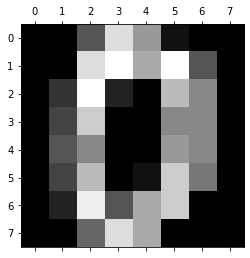

In [21]:
# Take a look at an example
print("data = ", digits.data[0])
print("target = ", digits.target[0])

# Display a sample image
%matplotlib inline
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 
plt.show()

In [22]:
# Preprocessing the input data
# Scale digits.data with SciKit-Learn's StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(digits.data)
digits.data = scaler.transform(digits.data)
print(digits.data.shape)
print(digits.data[0])

(1797, 64)
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -0.02359646 -0.29908135  0.08671869  0.20829258
 -0.36677122 -1.14664746 -0.5056698  -0.19600752]


In [23]:
# Use SciKit-Learn's built-in function train_test_split to get training and and test data with 80-20 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2)

In [24]:
# One-Hot encode target training data
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories=[digits.target_names])
y_train = y_train.reshape(y_train.shape[0], 1)
encoder.fit(y_train)
y_train = encoder.transform(y_train).toarray()
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [25]:
# A quick check to ensure that values have not vanished or exploded
def diverges(lis):
    for i in range(len(lis)):
        if np.isnan(lis[i]).any() or np.isinf(lis[i]).any():
            return True
    return False

In [26]:
# Batch Gradient Descent

# Create Network
digits_network = network_with_backprop()

# Add layer
digits_network.add_layer(64)
digits_network.add_layer(256)
digits_network.add_layer(256)
digits_network.add_layer(10)

learning_rate = 0.1

number_of_epochs = 3000

for epoch in range(number_of_epochs):
    
    if epoch%100 == 0:
        print("Epoch = ", epoch)
    
    Z, A = digits_network.forward_pass(X_train)
    if diverges(Z) or diverges(A):
        print("Diverges!")
        break
    
    D_W, D_B, mean_D_W, mean_D_B = digits_network.backprop(Z, A, y_train)
    if diverges(mean_D_W) or diverges(mean_D_B):
        print("Diverges!")
        break
    
    digits_network.update(mean_D_W, mean_D_B, learning_rate)

Epoch =  0
Epoch =  100
Epoch =  200
Epoch =  300
Epoch =  400
Epoch =  500
Epoch =  600
Epoch =  700
Epoch =  800
Epoch =  900
Epoch =  1000
Epoch =  1100
Epoch =  1200
Epoch =  1300
Epoch =  1400
Epoch =  1500
Epoch =  1600
Epoch =  1700
Epoch =  1800
Epoch =  1900
Epoch =  2000
Epoch =  2100
Epoch =  2200
Epoch =  2300
Epoch =  2400
Epoch =  2500
Epoch =  2600
Epoch =  2700
Epoch =  2800
Epoch =  2900


In [27]:
# Test Batch Gradient Descent

# Pass the test data through the network
Z, A = digits_network.forward_pass(X_test)

# The predicted digit is the one with the largest output, that is, the one nearest to the shape 0,0,...,0,1,0,...,0,0
y_pred = np.array([np.argmax(i) for i in A[-1]])

# Use SciKit-learn's built-in function accuracy_score to find the accuracy of the network in percentage terms
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

65.83333333333333

In [28]:
# Stochastic Gradient Descent

digits_network_stoch = network_with_backprop()

digits_network_stoch.add_layer(64)
digits_network_stoch.add_layer(256)
digits_network_stoch.add_layer(256)
digits_network_stoch.add_layer(10)

learning_rate = 0.1

number_of_epochs = 3000

# Number of Training Samples
m = len(X_train)

for epoch in range(number_of_epochs):
    
    if epoch%100 == 0:
        print("Epoch = ", epoch)
    
    index = np.arange(m)
    np.random.shuffle(index)
    
    for i in range(m):
        X = X_train[index[i]]
        y = y_train[index[i]]
        X = np.array([X])
        y = np.array([y])
        
        Z, A = digits_network_stoch.forward_pass(X)
        if diverges(Z) or diverges(A):
            print("Diverges!")
            break
        
        D_W, D_B, mean_D_W, mean_D_B = digits_network_stoch.backprop(Z, A, y)
        if diverges(mean_D_W) or diverges(mean_D_B):
            print("Diverges!")
            break
        
        digits_network_stoch.update(mean_D_W, mean_D_B, learning_rate)

Epoch =  0
Epoch =  100
Epoch =  200
Epoch =  300
Epoch =  400
Epoch =  500
Epoch =  600
Epoch =  700
Epoch =  800
Epoch =  900
Epoch =  1000
Epoch =  1100
Epoch =  1200
Epoch =  1300
Epoch =  1400
Epoch =  1500
Epoch =  1600
Epoch =  1700
Epoch =  1800
Epoch =  1900
Epoch =  2000
Epoch =  2100
Epoch =  2200
Epoch =  2300
Epoch =  2400
Epoch =  2500
Epoch =  2600
Epoch =  2700
Epoch =  2800
Epoch =  2900


In [29]:
# Test Stochastic Gradient Descent

# Pass the test data through the network
Z_stoch, A_stoch = digits_network_stoch.forward_pass(X_test)

# The predicted digit is the one with the largest output, that is, the one nearest to the shape 0,0,...,0,1,0,...,0,0
y_pred_stoch = np.array([np.argmax(i) for i in A_stoch[-1]])

# Use SciKit-learn's built-in function accuracy_score to find the accuracy of the network in percentage terms
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_stoch)*100

97.22222222222221

In [30]:
# Mini-Batch Gradient Descent

# Create Network
digits_network_mini = network_with_backprop()

digits_network_mini.add_layer(64)
digits_network_mini.add_layer(256)
digits_network_mini.add_layer(256)
digits_network_mini.add_layer(10)

learning_rate = 0.1

number_of_epochs = 3000

# Number of Training Samples
m = len(X_train)

# Mini-Batch Size
bs = 64

for epoch in range(number_of_epochs):
    
    if epoch%100 == 0:
        print("Epoch = ", epoch)
    
    index = np.arange(m)
    np.random.shuffle(index)
    
    for i in range(int(m/bs)):
        Sub_X = np.array([X_train[index[bs*i + j]] for j in range(bs)])
        Sub_y = np.array([y_train[index[bs*i + j]] for j in range(bs)])
        
        Z, A = digits_network_mini.forward_pass(Sub_X)
        if diverges(Z) or diverges(A):
            print("Diverges!")
            break
        
        D_W, D_B, mean_D_W, mean_D_B = digits_network_mini.backprop(Z, A, Sub_y)
        if diverges(mean_D_W) or diverges(mean_D_B):
            print("Diverges!")
            break
        
        digits_network_mini.update(mean_D_W, mean_D_B, learning_rate)

Epoch =  0
Epoch =  100
Epoch =  200
Epoch =  300
Epoch =  400
Epoch =  500
Epoch =  600
Epoch =  700
Epoch =  800
Epoch =  900
Epoch =  1000
Epoch =  1100
Epoch =  1200
Epoch =  1300
Epoch =  1400
Epoch =  1500
Epoch =  1600
Epoch =  1700
Epoch =  1800
Epoch =  1900
Epoch =  2000
Epoch =  2100
Epoch =  2200
Epoch =  2300
Epoch =  2400
Epoch =  2500
Epoch =  2600
Epoch =  2700
Epoch =  2800
Epoch =  2900


In [31]:
# Test Mini-Batch Gradient Descent

# Pass the test data through the network
Z_mini, A_mini = digits_network_mini.forward_pass(X_test)

# The predicted digit is the one with the largest output, that is, the one nearest to the shape 0,0,...,0,1,0,...,0,0
y_pred_mini = np.array([np.argmax(i) for i in A_mini[-1]])

# Use SciKit-learn's built-in function accuracy_score to find the accuracy of the network in percentage terms
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_mini)*100

95.27777777777777